## Dowload Data From Bitmex

In [7]:
import requests
import pandas as pd
import numpy as np
import bitmex
import datetime
import time

In [8]:
_id = 'pp4hgyxX5xwuiN83bQSlE79T'
secret = 'oAqov-BAUyvlRNu682eYzeSBfQM1071_mnKCzhjh_VTesdbU'


In [16]:
client = bitmex.bitmex(test=False,
                       api_key=_id,
                       api_secret=secret)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/swagger_spec_validator/validator20.py:52: SwaggerValidationWarning: Found "$ref: #/definitions/UserPreferences" with siblings that will be overwritten. See https://stackoverflow.com/a/48114924 for more information. (path #/definitions/User/properties/preferences)
  ref_dict['$ref'], '/'.join(path),


In [60]:
r1 = client.Quote.Quote_get(symbol="XBTH22",
                       startTime = datetime.datetime(2021, 7, 1)).result()

print(r1)
# r2 = client.Quote.Quote_get(symbol="XBTQ22",
#                        startTime = datetime.datetime(2020, 9, 1),
#                        endTime   = datetime.datetime(2020, 11, 21)).result()

([], <bravado.requests_client.RequestsResponseAdapter object at 0x7fdbd6e53e90>)


In [51]:
response = requests.get("http://api.open-notify.org/astros.json")

([], <bravado.requests_client.RequestsResponseAdapter at 0x7fdbd6d04a10>)

In [61]:
pd.read_csv('20220702.csv.gz.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte

In [63]:
import gzip
import shutil
with gzip.open('20220702.csv.gz', 'rb') as f_in:
    with open('file.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

array(['ADAU22', 'ADAUSD', 'ADAUSDT', 'ALTMEXTUSDT', 'APEUSD', 'APEUSDT',
       'APE_USDT', 'AVAXUSD', 'AVAXUSDT', 'AXSUSD', 'AXS_USDT', 'BCHUSD',
       'BCHUSDT', 'BNBUSD', 'BNBUSDT', 'DEFIMEXTUSDT', 'DOGEUSD',
       'DOGEUSDT', 'DOTUSD', 'DOTUSDT', 'EOSUSD', 'EOSUSDT', 'ETHU22',
       'ETHUSD', 'ETHUSDT', 'ETHUSDTU22', 'ETHUSDU22', 'ETHUSDU22_ETH',
       'ETHUSD_ETH', 'ETH_USDT', 'FTMUSDT', 'GALUSD', 'GALUSDT', 'GMTUSD',
       'GMTUSDT', 'LINKUSD', 'LINKUSDT', 'LINK_USDT', 'LTCUSD', 'LTCUSDT',
       'LUNAUSD', 'LUNAUSDT', 'MANAUSDT', 'MATICUSDT', 'MATIC_USDT',
       'METAMEXTUSDT', 'NEARUSD', 'NEARUSDT', 'SANDUSDT', 'SHIBUSDT',
       'SOLUSD', 'SOLUSDT', 'TRXUSD', 'TRXUSDT', 'UNI_USDT', 'XBTEUR',
       'XBTH23', 'XBTN22', 'XBTU22', 'XBTUSD', 'XBTUSDT', 'XBTUSDTU22',
       'XBTUSDTZ22', 'XBTZ22', 'XBT_USDT', 'XRPU22', 'XRPUSD', 'XRPUSDT'],
      dtype=object)

In [79]:
folder = 'bitmexHistoricalData/'
path = folder + 'test'
date = 20191122
r = requests.get('https://s3-eu-west-1.amazonaws.com/public.bitmex.com/data/quote/%i.csv.gz'%date)
with open(path, 'wb') as fp:
    fp.write(r.content)

In [80]:
with gzip.open(path, 'rb') as f_in:
    with open('file.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
        
df = pd.read_csv('file.txt')
df.symbol.unique()

array(['ADAZ19', 'BCHZ19', 'EOSZ19', 'ETHUSD', 'ETHZ19', 'LTCZ19',
       'TRXZ19', 'XBT7D_D95', 'XBT7D_U105', 'XBTH20', 'XBTUSD', 'XBTZ19',
       'XRPZ19'], dtype=object)

In [81]:
df.to_pickle(folder+str(date)+'.pickle')

In [82]:
pd.read_pickle(folder+str(date)+'.pickle')

,timestamp,symbol,bidSize,bidPrice,askPrice,askSize
0,2019-11-22D00:00:04.300281000,ADAZ19,423393.0,0.000005,0.000005,1117140.0
1,2019-11-22D00:00:11.985700000,ADAZ19,423393.0,0.000005,0.000005,1119690.0
2,2019-11-22D00:00:11.992818000,ADAZ19,423393.0,0.000005,0.000005,1117140.0
3,2019-11-22D00:00:21.413527000,ADAZ19,423393.0,0.000005,0.000005,1067140.0
4,2019-11-22D00:00:23.209338000,ADAZ19,435394.0,0.000005,0.000005,1083859.0
...,...,...,...,...,...,...
6389435,2019-11-22D23:59:56.552392000,XRPZ19,318112.0,0.000031,0.000031,105965.0
6389436,2019-11-22D23:59:56.560427000,XRPZ19,323112.0,0.000031,0.000031,105965.0
6389437,2019-11-22D23:59:56.882349000,XRPZ19,323112.0,0.000031,0.000031,115027.0
6389438,2019-11-22D23:59:59.351676000,XRPZ19,324432.0,0.000031,0.000031,115027.0


In [113]:
startDate = 20150101

date_arr = []
i=1

date = int(datetime.datetime.now().strftime('%Y%M%d'))

while date > startDate:
    date = (datetime.datetime.now() - datetime.timedelta(days=i))
    date = int(date.strftime('%Y%m%d'))
    date_arr.append(date)
    i+=1
    
date_arr

[20220801,
 20220731,
 20220730,
 20220729,
 20220728,
 20220727,
 20220726,
 20220725,
 20220724,
 20220723,
 20220722,
 20220721,
 20220720,
 20220719,
 20220718,
 20220717,
 20220716,
 20220715,
 20220714,
 20220713,
 20220712,
 20220711,
 20220710,
 20220709,
 20220708,
 20220707,
 20220706,
 20220705,
 20220704,
 20220703,
 20220702,
 20220701,
 20220630,
 20220629,
 20220628,
 20220627,
 20220626,
 20220625,
 20220624,
 20220623,
 20220622,
 20220621,
 20220620,
 20220619,
 20220618,
 20220617,
 20220616,
 20220615,
 20220614,
 20220613,
 20220612,
 20220611,
 20220610,
 20220609,
 20220608,
 20220607,
 20220606,
 20220605,
 20220604,
 20220603,
 20220602,
 20220601,
 20220531,
 20220530,
 20220529,
 20220528,
 20220527,
 20220526,
 20220525,
 20220524,
 20220523,
 20220522,
 20220521,
 20220520,
 20220519,
 20220518,
 20220517,
 20220516,
 20220515,
 20220514,
 20220513,
 20220512,
 20220511,
 20220510,
 20220509,
 20220508,
 20220507,
 20220506,
 20220505,
 20220504,
 20220503,

In [116]:
folder = 'bitmexHistoricalData/'

for date in date_arr:
    print('Working on %i'%date)
    r = requests.get('https://s3-eu-west-1.amazonaws.com/public.bitmex.com/data/quote/%i.csv.gz'%date)
    path = folder + '%i.csv.gz'%date
    with open(path, 'wb') as fp:
        fp.write(r.content)
        time.sleep(1)

Working on 20220801
Working on 20220731
Working on 20220730
Working on 20220729
Working on 20220728
Working on 20220727
Working on 20220726
Working on 20220725
Working on 20220724
Working on 20220723
Working on 20220722
Working on 20220721
Working on 20220720
Working on 20220719
Working on 20220718
Working on 20220717
Working on 20220716
Working on 20220715
Working on 20220714
Working on 20220713
Working on 20220712
Working on 20220711
Working on 20220710
Working on 20220709
Working on 20220708
Working on 20220707
Working on 20220706
Working on 20220705
Working on 20220704
Working on 20220703
Working on 20220702
Working on 20220701
Working on 20220630
Working on 20220629
Working on 20220628
Working on 20220627
Working on 20220626
Working on 20220625
Working on 20220624
Working on 20220623
Working on 20220622
Working on 20220621
Working on 20220620
Working on 20220619
Working on 20220618
Working on 20220617
Working on 20220616
Working on 20220615
Working on 20220614
Working on 20220613


Working on 20210617
Working on 20210616
Working on 20210615
Working on 20210614
Working on 20210613
Working on 20210612
Working on 20210611
Working on 20210610
Working on 20210609
Working on 20210608
Working on 20210607
Working on 20210606
Working on 20210605
Working on 20210604
Working on 20210603
Working on 20210602
Working on 20210601
Working on 20210531
Working on 20210530
Working on 20210529
Working on 20210528
Working on 20210527
Working on 20210526
Working on 20210525
Working on 20210524
Working on 20210523
Working on 20210522
Working on 20210521
Working on 20210520
Working on 20210519
Working on 20210518
Working on 20210517
Working on 20210516
Working on 20210515
Working on 20210514
Working on 20210513
Working on 20210512
Working on 20210511
Working on 20210510
Working on 20210509
Working on 20210508
Working on 20210507
Working on 20210506
Working on 20210505
Working on 20210504
Working on 20210503
Working on 20210502
Working on 20210501
Working on 20210430
Working on 20210429


Working on 20200503
Working on 20200502
Working on 20200501
Working on 20200430
Working on 20200429
Working on 20200428
Working on 20200427
Working on 20200426
Working on 20200425
Working on 20200424
Working on 20200423
Working on 20200422
Working on 20200421
Working on 20200420
Working on 20200419
Working on 20200418
Working on 20200417
Working on 20200416
Working on 20200415
Working on 20200414
Working on 20200413
Working on 20200412
Working on 20200411
Working on 20200410
Working on 20200409
Working on 20200408
Working on 20200407
Working on 20200406
Working on 20200405
Working on 20200404
Working on 20200403
Working on 20200402
Working on 20200401
Working on 20200331
Working on 20200330
Working on 20200329
Working on 20200328
Working on 20200327
Working on 20200326
Working on 20200325
Working on 20200324
Working on 20200323
Working on 20200322
Working on 20200321
Working on 20200320
Working on 20200319
Working on 20200318
Working on 20200317
Working on 20200316
Working on 20200315


Working on 20190320
Working on 20190319
Working on 20190318
Working on 20190317
Working on 20190316
Working on 20190315
Working on 20190314
Working on 20190313
Working on 20190312
Working on 20190311
Working on 20190310
Working on 20190309
Working on 20190308
Working on 20190307
Working on 20190306
Working on 20190305
Working on 20190304
Working on 20190303
Working on 20190302
Working on 20190301
Working on 20190228
Working on 20190227
Working on 20190226
Working on 20190225
Working on 20190224
Working on 20190223
Working on 20190222
Working on 20190221
Working on 20190220
Working on 20190219
Working on 20190218
Working on 20190217
Working on 20190216
Working on 20190215
Working on 20190214
Working on 20190213
Working on 20190212
Working on 20190211
Working on 20190210
Working on 20190209
Working on 20190208
Working on 20190207
Working on 20190206
Working on 20190205
Working on 20190204
Working on 20190203
Working on 20190202
Working on 20190201
Working on 20190131
Working on 20190130


Working on 20180203
Working on 20180202
Working on 20180201
Working on 20180131
Working on 20180130
Working on 20180129
Working on 20180128
Working on 20180127
Working on 20180126
Working on 20180125
Working on 20180124
Working on 20180123
Working on 20180122
Working on 20180121
Working on 20180120
Working on 20180119
Working on 20180118
Working on 20180117
Working on 20180116
Working on 20180115
Working on 20180114
Working on 20180113
Working on 20180112
Working on 20180111
Working on 20180110
Working on 20180109
Working on 20180108
Working on 20180107
Working on 20180106
Working on 20180105
Working on 20180104
Working on 20180103
Working on 20180102
Working on 20180101
Working on 20171231
Working on 20171230
Working on 20171229
Working on 20171228
Working on 20171227
Working on 20171226
Working on 20171225
Working on 20171224
Working on 20171223
Working on 20171222
Working on 20171221
Working on 20171220
Working on 20171219
Working on 20171218
Working on 20171217
Working on 20171216


Working on 20161220
Working on 20161219
Working on 20161218
Working on 20161217
Working on 20161216
Working on 20161215
Working on 20161214
Working on 20161213
Working on 20161212
Working on 20161211
Working on 20161210
Working on 20161209
Working on 20161208
Working on 20161207
Working on 20161206
Working on 20161205
Working on 20161204
Working on 20161203
Working on 20161202
Working on 20161201
Working on 20161130
Working on 20161129
Working on 20161128
Working on 20161127
Working on 20161126
Working on 20161125
Working on 20161124
Working on 20161123
Working on 20161122
Working on 20161121
Working on 20161120
Working on 20161119
Working on 20161118
Working on 20161117
Working on 20161116
Working on 20161115
Working on 20161114
Working on 20161113
Working on 20161112
Working on 20161111
Working on 20161110
Working on 20161109
Working on 20161108
Working on 20161107
Working on 20161106
Working on 20161105
Working on 20161104
Working on 20161103
Working on 20161102
Working on 20161101


Working on 20151106
Working on 20151105
Working on 20151104
Working on 20151103
Working on 20151102
Working on 20151101
Working on 20151031
Working on 20151030
Working on 20151029
Working on 20151028
Working on 20151027
Working on 20151026
Working on 20151025
Working on 20151024
Working on 20151023
Working on 20151022
Working on 20151021
Working on 20151020
Working on 20151019
Working on 20151018
Working on 20151017
Working on 20151016
Working on 20151015
Working on 20151014
Working on 20151013
Working on 20151012
Working on 20151011
Working on 20151010
Working on 20151009
Working on 20151008
Working on 20151007
Working on 20151006
Working on 20151005
Working on 20151004
Working on 20151003
Working on 20151002
Working on 20151001
Working on 20150930
Working on 20150929
Working on 20150928
Working on 20150927
Working on 20150926
Working on 20150925
Working on 20150924
Working on 20150923
Working on 20150922
Working on 20150921
Working on 20150920
Working on 20150919
Working on 20150918


## Parsing and Cleaning

In [1]:
import ray
import os, sys
import numpy as np
import pandas as pd
import gzip
import shutil

try:
    ray.init()
except RuntimeError:
    ray.shutdown()
    ray.init()

In [2]:
path = '/Volumes/external_SSD/copulaData/Bitmex_raw/'
ls_all = [l for l in os.listdir(path) if l.endswith('.gz')]
ls_all
# pd.read_pickle()

['20150101.csv.gz',
 '20150102.csv.gz',
 '20150103.csv.gz',
 '20150104.csv.gz',
 '20150105.csv.gz',
 '20150106.csv.gz',
 '20150107.csv.gz',
 '20150108.csv.gz',
 '20150109.csv.gz',
 '20150110.csv.gz',
 '20150111.csv.gz',
 '20150112.csv.gz',
 '20150113.csv.gz',
 '20150114.csv.gz',
 '20150115.csv.gz',
 '20150116.csv.gz',
 '20150117.csv.gz',
 '20150118.csv.gz',
 '20150119.csv.gz',
 '20150120.csv.gz',
 '20150121.csv.gz',
 '20150122.csv.gz',
 '20150123.csv.gz',
 '20150124.csv.gz',
 '20150125.csv.gz',
 '20150126.csv.gz',
 '20150127.csv.gz',
 '20150128.csv.gz',
 '20150129.csv.gz',
 '20150130.csv.gz',
 '20150131.csv.gz',
 '20150201.csv.gz',
 '20150202.csv.gz',
 '20150203.csv.gz',
 '20150204.csv.gz',
 '20150205.csv.gz',
 '20150206.csv.gz',
 '20150207.csv.gz',
 '20150208.csv.gz',
 '20150209.csv.gz',
 '20150210.csv.gz',
 '20150211.csv.gz',
 '20150212.csv.gz',
 '20150213.csv.gz',
 '20150214.csv.gz',
 '20150215.csv.gz',
 '20150216.csv.gz',
 '20150217.csv.gz',
 '20150218.csv.gz',
 '20150219.csv.gz',


In [3]:
coinNames = ['ETH', 'LINK', 'XBT']

In [4]:
import os, sys

path = '/Volumes/external_SSD/copulaData/Bitmex_raw/'


def getDFbySymbol(coinName, path, year):
    
    ls = [l for l in os.listdir(path) if l.endswith('.gz') & l.startswith(year)]
    
    @ray.remote(num_returns = 1)
    def unzipRead(l):
        print(l)
        with gzip.open(path+l, 'rb') as f_in:
            df = pd.read_csv(f_in)   
        symbols = [s for s in list(df.symbol.unique()) if s.startswith(coinName)]  
        _id = df.symbol.isin(symbols)
        return df.loc[_id,:]
    
    results = ray.get([unzipRead.remote(l) for l in ls])
    return results

In [5]:
# year = '2020'
# ls = [l for l in os.listdir(path) if l.endswith('.gz') & l.startswith(year)]

# l = ls[-10]
# with gzip.open(path+l, 'rb') as f_in:
#     df = pd.read_csv(f_in)   



In [45]:
monthCodes = [a for a in 'FGHJKMNQUVXZ']
yearCodes = ['18','19','20','21','22','23']
pairs = ['XBTUSD']

targetedSymbols = []
for i in pairs:
    for j in monthCodes:
        for k in yearCodes:
            targetedSymbols.append(i+j+k)
            
targetedSymbols.append('XBTUSD')

def floor(datetimeObj):
    return datetimeObj.replace(second=0, minute=0, microsecond=0)


def hourlyData(df): # hourly last quote
    _df = df.copy()
    _df.loc[:,'timestamp1'] = pd.to_datetime(df.timestamp, format='%Y-%m-%dD%H:%M:%S.%f')
    _df.loc[:,'timestamp2'] = _df.timestamp1.apply(floor) 
    _df = _df.drop_duplicates(['timestamp2', 'symbol'], keep='last')
#     print(len(_df))
    return _df.reset_index(drop=True)

In [12]:
# ETH = getDFbySymbol('XBTUSD', path, year)
coinName = 'XBTUSD'
year_arr = [str(202000+i) for i in range(1,13)]

for year in year_arr:
    print(year)
    ls = [l for l in ls_all if l.endswith('.gz') & l.startswith(year)]
    
    ETH = []
    for l in ls:
        print(l)
        with gzip.open(path+l, 'rb') as f_in:
            df = pd.read_csv(f_in)   
            symbols = [s for s in list(df.symbol.unique()) if s.startswith(coinName)]  
            _id = df.symbol.isin(symbols)
            ETH.append(df.loc[_id,:])


    results = {k: [] for k in targetedSymbols}

    for i, df in enumerate(ETH):
        print(i, len(ETH))
        symbolsInData = set(df.symbol)
        _symbols = list(set(targetedSymbols).intersection(symbolsInData))
        for s in _symbols:
            print(s)
            _id = df.symbol == s
            results[s].append(df.loc[_id, :])

    results1 = {k: results[k] for k in results if len(results[k])!=0 }

    for k in results1:
        print(k)
        for i in range(len(results[k])):
            print(i)
            results1[k][i] = hourlyData(results1[k][i])

    results2 = dict()
    for k in results1:
        results2[k] = pd.concat(results1[k], axis=0, ignore_index=True)

    # midPrice
    for k in results2:
        results2[k].loc[:, 'midPrice'] = (results2[k].bidPrice + results2[k].askPrice) / 2


    results3 = dict()
    for k in results2:
        results3[k] = results2[k].loc[:,['timestamp2', 'midPrice']]

    for k in results3:
        results3[k].columns = ['timestamp2', 'midPrice'+k]

    df = results3[coinName].loc[:, ['timestamp2']].copy()

    for k in results3:
        print(k)
        df = df.merge(results3[k], on='timestamp2',
                      how='outer')

    df.to_pickle('Bitmex_%s_futures_%s_hourly.pickle'%(coinName, year))

202001
20200101.csv.gz
20200102.csv.gz
20200103.csv.gz
20200104.csv.gz
20200105.csv.gz
20200106.csv.gz
20200107.csv.gz
20200108.csv.gz
20200109.csv.gz
20200110.csv.gz
20200111.csv.gz
20200112.csv.gz
20200113.csv.gz
20200114.csv.gz
20200115.csv.gz
20200116.csv.gz
20200117.csv.gz
20200118.csv.gz
20200119.csv.gz
20200120.csv.gz
20200121.csv.gz
20200122.csv.gz
20200123.csv.gz
20200124.csv.gz
20200125.csv.gz
20200126.csv.gz
20200127.csv.gz
20200128.csv.gz
20200129.csv.gz
20200130.csv.gz
20200131.csv.gz
0 31
XBTUSD
1 31
XBTUSD
2 31
XBTUSD
3 31
XBTUSD
4 31
XBTUSD
5 31
XBTUSD
6 31
XBTUSD
7 31
XBTUSD
8 31
XBTUSD
9 31
XBTUSD
10 31
XBTUSD
11 31
XBTUSD
12 31
XBTUSD
13 31
XBTUSD
14 31
XBTUSD
15 31
XBTUSD
16 31
XBTUSD
17 31
XBTUSD
18 31
XBTUSD
19 31
XBTUSD
20 31
XBTUSD
21 31
XBTUSD
22 31
XBTUSD
23 31
XBTUSD
24 31
XBTUSD
25 31
XBTUSD
26 31
XBTUSD
27 31
XBTUSD
28 31
XBTUSD
29 31
XBTUSD
30 31
XBTUSD
XBTUSD
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
XBTUSD
202002


20200925.csv.gz
20200926.csv.gz
20200927.csv.gz
20200928.csv.gz
20200929.csv.gz
20200930.csv.gz
0 30
XBTUSD
1 30
XBTUSD
2 30
XBTUSD
3 30
XBTUSD
4 30
XBTUSD
5 30
XBTUSD
6 30
XBTUSD
7 30
XBTUSD
8 30
XBTUSD
9 30
XBTUSD
10 30
XBTUSD
11 30
XBTUSD
12 30
XBTUSD
13 30
XBTUSD
14 30
XBTUSD
15 30
XBTUSD
16 30
XBTUSD
17 30
XBTUSD
18 30
XBTUSD
19 30
XBTUSD
20 30
XBTUSD
21 30
XBTUSD
22 30
XBTUSD
23 30
XBTUSD
24 30
XBTUSD
25 30
XBTUSD
26 30
XBTUSD
27 30
XBTUSD
28 30
XBTUSD
29 30
XBTUSD
XBTUSD
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
XBTUSD
202010
20201001.csv.gz
20201002.csv.gz
20201003.csv.gz
20201004.csv.gz
20201005.csv.gz
20201006.csv.gz
20201007.csv.gz
20201008.csv.gz
20201009.csv.gz
20201010.csv.gz
20201011.csv.gz
20201012.csv.gz
20201013.csv.gz
20201014.csv.gz
20201015.csv.gz
20201016.csv.gz
20201017.csv.gz
20201018.csv.gz
20201019.csv.gz
20201020.csv.gz
20201021.csv.gz
20201022.csv.gz
20201023.csv.gz
20201024.csv.gz
20201025.csv.gz
20201026.csv.gz
2020102

F	Jan	N	Jul
G	Feb	Q	Aug
H	Mar	U	Sep
J	Apr	V	Oct
K	May	X	Nov
M	Jun	Z	Dec

F	Jan	N	Jul
G	Feb	Q	Aug
H	Mar	U	Sep
J	Apr	V	Oct
K	May	X	Nov
M	Jun	Z	Dec

In [13]:
pd.read_pickle('Bitmex_%s_futures_%s_hourly.pickle'%(coinName, year))

,timestamp2,midPriceXBTUSD
0,2020-12-01 00:00:00,19592.75
1,2020-12-01 01:00:00,19629.75
2,2020-12-01 02:00:00,19695.75
3,2020-12-01 03:00:00,19441.75
4,2020-12-01 04:00:00,19371.25
...,...,...
739,2020-12-31 19:00:00,28914.25
740,2020-12-31 20:00:00,29173.75
741,2020-12-31 21:00:00,29005.75
742,2020-12-31 22:00:00,29129.75


In [ ]:
_id = df.isna().sum(axis=1) <= 3
df.loc[_id, :]

In [14]:
symbols

['XBTUSD']

In [40]:
l = '20200515.csv.gz'
with gzip.open(path+l, 'rb') as f_in:
    df = pd.read_csv(f_in)   
    symbols = [s for s in list(df.symbol.unique()) if s.startswith(coinName)]  

In [41]:
df.loc[df.symbol == 'XBTUSDTM22',:]

,timestamp,symbol,bidSize,bidPrice,askPrice,askSize


In [94]:
path = '/Volumes/external_SSD/copulaData/Bitmex_raw/'
ls = os.listdir(path)
ls = [l for l in ls if l.endswith('.gz')][::-1]

# l = '20220515.csv.gz'

for l in ls:
    fileName = l.replace('.csv.gz', '')+'.csv'
    print(fileName)
    
    with gzip.open(path+l, 'rb') as f_in:
        df = pd.read_csv(f_in)   
        
    _id = df.symbol.apply(lambda x: x in symbols)
    n = np.sum(_id)
    if n !=0:
        print(df.symbol.unique())
        df = df.loc[_id,:]
        df = hourlyData(df)
        print(len(df), 'rows saved')
        df.to_csv(path + 'csvFiles/'+fileName)

20220731.csv
['ADAU22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSD' 'APEUSDT' 'APE_USDT'
 'AVAXUSD' 'AVAXUSDT' 'AXSUSD' 'AXS_USDT' 'BCHUSD' 'BCHUSDT' 'BNBUSD'
 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD'
 'EOSUSDT' 'ETHU22' 'ETHUSD' 'ETHUSDT' 'ETHUSDTU22' 'ETHUSDU22'
 'ETHUSDU22_ETH' 'ETHUSD_ETH' 'ETH_USDT' 'FTMUSDT' 'GALUSD' 'GALUSDT'
 'GMTUSD' 'GMTUSDT' 'LINKUSD' 'LINKUSDT' 'LINK_USDT' 'LTCUSD' 'LTCUSDT'
 'LUNAUSD' 'LUNAUSDT' 'MANAUSDT' 'MATICUSDT' 'MATIC_USDT' 'METAMEXTUSDT'
 'NEARUSD' 'NEARUSDT' 'SANDUSDT' 'SHIBUSDT' 'SOLUSD' 'SOLUSDT' 'TRXUSD'
 'TRXUSDT' 'UNI_USDT' 'XBTEUR' 'XBTH23' 'XBTQ22' 'XBTU22' 'XBTUSD'
 'XBTUSDT' 'XBTUSDTU22' 'XBTUSDTZ22' 'XBTZ22' 'XBT_USDT' 'XRPU22' 'XRPUSD'
 'XRPUSDT']
285 rows saved
20220730.csv
['ADAU22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSD' 'APEUSDT' 'APE_USDT'
 'AVAXUSD' 'AVAXUSDT' 'AXSUSD' 'AXS_USDT' 'BCHUSD' 'BCHUSDT' 'BNBUSD'
 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD'
 'EOSUSDT' 'ETHU22

288 rows saved
20220720.csv
['ADAU22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSD' 'APEUSDT' 'APE_USDT'
 'AVAXUSD' 'AVAXUSDT' 'AXSUSD' 'AXS_USDT' 'BCHUSD' 'BCHUSDT' 'BNBUSD'
 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD'
 'EOSUSDT' 'ETHU22' 'ETHUSD' 'ETHUSDT' 'ETHUSDTU22' 'ETHUSDU22'
 'ETHUSDU22_ETH' 'ETHUSD_ETH' 'ETH_USDT' 'FTMUSDT' 'GALUSD' 'GALUSDT'
 'GMTUSD' 'GMTUSDT' 'LINKUSD' 'LINKUSDT' 'LINK_USDT' 'LTCUSD' 'LTCUSDT'
 'LUNAUSD' 'LUNAUSDT' 'MANAUSDT' 'MATICUSDT' 'MATIC_USDT' 'METAMEXTUSDT'
 'NEARUSD' 'NEARUSDT' 'SANDUSDT' 'SHIBUSDT' 'SOLUSD' 'SOLUSDT' 'TRXUSD'
 'TRXUSDT' 'UNI_USDT' 'XBTEUR' 'XBTH23' 'XBTN22' 'XBTU22' 'XBTUSD'
 'XBTUSDT' 'XBTUSDTU22' 'XBTUSDTZ22' 'XBTZ22' 'XBT_USDT' 'XRPU22' 'XRPUSD'
 'XRPUSDT']
288 rows saved
20220719.csv
['ADAU22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSD' 'APEUSDT' 'APE_USDT'
 'AVAXUSD' 'AVAXUSDT' 'AXSUSD' 'AXS_USDT' 'BCHUSD' 'BCHUSDT' 'BNBUSD'
 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD'
 'E

288 rows saved
20220709.csv
['ADAU22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSD' 'APEUSDT' 'APE_USDT'
 'AVAXUSD' 'AVAXUSDT' 'AXSUSD' 'AXS_USDT' 'BCHUSD' 'BCHUSDT' 'BNBUSD'
 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD'
 'EOSUSDT' 'ETHU22' 'ETHUSD' 'ETHUSDT' 'ETHUSDTU22' 'ETHUSDU22'
 'ETHUSDU22_ETH' 'ETHUSD_ETH' 'ETH_USDT' 'FTMUSDT' 'GALUSD' 'GALUSDT'
 'GMTUSD' 'GMTUSDT' 'LINKUSD' 'LINKUSDT' 'LINK_USDT' 'LTCUSD' 'LTCUSDT'
 'LUNAUSD' 'LUNAUSDT' 'MANAUSDT' 'MATICUSDT' 'MATIC_USDT' 'METAMEXTUSDT'
 'NEARUSD' 'NEARUSDT' 'SANDUSDT' 'SHIBUSDT' 'SOLUSD' 'SOLUSDT' 'TRXUSD'
 'TRXUSDT' 'UNI_USDT' 'XBTEUR' 'XBTH23' 'XBTN22' 'XBTU22' 'XBTUSD'
 'XBTUSDT' 'XBTUSDTU22' 'XBTUSDTZ22' 'XBTZ22' 'XBT_USDT' 'XRPU22' 'XRPUSD'
 'XRPUSDT']
288 rows saved
20220708.csv
['ADAU22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSD' 'APEUSDT' 'APE_USDT'
 'AVAXUSD' 'AVAXUSDT' 'AXSUSD' 'AXS_USDT' 'BCHUSD' 'BCHUSDT' 'BNBUSD'
 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD'
 'E

288 rows saved
20220628.csv
['ADAU22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSD' 'APEUSDT' 'APE_USDT'
 'AVAXUSD' 'AVAXUSDT' 'AXSUSD' 'AXS_USDT' 'BCHUSD' 'BCHUSDT' 'BNBUSD'
 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD'
 'EOSUSDT' 'ETHU22' 'ETHUSD' 'ETHUSDT' 'ETHUSDTU22' 'ETHUSDU22'
 'ETHUSDU22_ETH' 'ETHUSD_ETH' 'ETH_USDT' 'FTMUSDT' 'GALUSD' 'GALUSDT'
 'GMTUSD' 'GMTUSDT' 'LINKUSD' 'LINKUSDT' 'LINK_USDT' 'LTCUSD' 'LTCUSDT'
 'LUNAUSD' 'LUNAUSDT' 'MANAUSDT' 'MATICUSDT' 'MATIC_USDT' 'METAMEXTUSDT'
 'NEARUSD' 'NEARUSDT' 'SANDUSDT' 'SHIBUSDT' 'SOLUSD' 'SOLUSDT' 'TRXUSD'
 'TRXUSDT' 'UNI_USDT' 'XBTEUR' 'XBTH23' 'XBTN22' 'XBTU22' 'XBTUSD'
 'XBTUSDT' 'XBTUSDTU22' 'XBTUSDTZ22' 'XBTZ22' 'XBT_USDT' 'XRPU22' 'XRPUSD'
 'XRPUSDT']
288 rows saved
20220627.csv
['ADAU22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSD' 'APEUSDT' 'APE_USDT'
 'AVAXUSD' 'AVAXUSDT' 'AXSUSD' 'AXS_USDT' 'BCHUSD' 'BCHUSDT' 'BNBUSD'
 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD'
 'E

360 rows saved
20220617.csv
['ADAM22' 'ADAU22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSD' 'APEUSDT'
 'APE_USDT' 'AVAXUSD' 'AVAXUSDT' 'AXSUSD' 'AXS_USDT' 'BCHUSD' 'BCHUSDT'
 'BNBUSD' 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'DOTUSDT'
 'EOSUSD' 'EOSUSDT' 'ETHM22' 'ETHU22' 'ETHUSD' 'ETHUSDM22' 'ETHUSDM22_ETH'
 'ETHUSDT' 'ETHUSDTM22' 'ETHUSDTU22' 'ETHUSDU22' 'ETHUSDU22_ETH'
 'ETHUSD_ETH' 'ETH_USDT' 'FTMUSDT' 'GALUSD' 'GALUSDT' 'GMTUSD' 'GMTUSDT'
 'LINKUSD' 'LINKUSDT' 'LINK_USDT' 'LTCUSD' 'LTCUSDT' 'LUNAUSD' 'LUNAUSDT'
 'MANAUSDT' 'MATICUSDT' 'MATIC_USDT' 'METAMEXTUSDT' 'NEARUSD' 'NEARUSDT'
 'SANDUSDT' 'SHIBUSDT' 'SOLUSD' 'SOLUSDT' 'TRXUSD' 'TRXUSDT' 'UNI_USDT'
 'XBTEUR' 'XBTH23' 'XBTM22' 'XBTN22' 'XBTU22' 'XBTUSD' 'XBTUSDT'
 'XBTUSDTM22' 'XBTUSDTU22' 'XBTUSDTZ22' 'XBTZ22' 'XBT_USDT' 'XRPM22'
 'XRPU22' 'XRPUSD' 'XRPUSDT']
360 rows saved
20220616.csv
['ADAM22' 'ADAU22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSD' 'APEUSDT'
 'APE_USDT' 'AVAXUSD' 'AVAXUSDT' 'AXSUSD' 'AXS_USDT' 'BCHUS

288 rows saved
20220606.csv
['ADAM22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSD' 'APEUSDT' 'APE_USDT'
 'AVAXUSD' 'AVAXUSDT' 'AXSUSD' 'AXS_USDT' 'BCHUSD' 'BCHUSDT' 'BNBUSD'
 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD'
 'EOSUSDT' 'ETHM22' 'ETHUSD' 'ETHUSDM22' 'ETHUSDM22_ETH' 'ETHUSDT'
 'ETHUSDTM22' 'ETHUSDU22_ETH' 'ETHUSD_ETH' 'ETH_USDT' 'FTMUSDT' 'GALUSD'
 'GALUSDT' 'GMTUSD' 'GMTUSDT' 'LINKUSD' 'LINKUSDT' 'LINK_USDT' 'LTCUSD'
 'LTCUSDT' 'LUNAUSD' 'LUNAUSDT' 'MANAUSDT' 'MATICUSDT' 'MATIC_USDT'
 'METAMEXTUSDT' 'NEARUSD' 'NEARUSDT' 'SANDUSDT' 'SHIBUSDT' 'SOLUSD'
 'SOLUSDT' 'TRXUSD' 'TRXUSDT' 'UNI_USDT' 'XBTEUR' 'XBTM22' 'XBTN22'
 'XBTU22' 'XBTUSD' 'XBTUSDT' 'XBTUSDTM22' 'XBTUSDTU22' 'XBTZ22' 'XBT_USDT'
 'XRPM22' 'XRPUSD' 'XRPUSDT']
288 rows saved
20220605.csv
['ADAM22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSD' 'APEUSDT' 'APE_USDT'
 'AVAXUSD' 'AVAXUSDT' 'AXSUSD' 'AXS_USDT' 'BCHUSD' 'BCHUSDT' 'BNBUSD'
 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'DOTUS

288 rows saved
20220525.csv
['ADAM22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSD' 'APEUSDT' 'APE_USDT'
 'AVAXUSD' 'AVAXUSDT' 'AXSUSD' 'AXS_USDT' 'BCHUSD' 'BCHUSDT' 'BNBUSD'
 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD'
 'EOSUSDT' 'ETHM22' 'ETHUSD' 'ETHUSDM22' 'ETHUSDT' 'ETHUSDTM22' 'ETH_USDT'
 'FTMUSDT' 'GALUSD' 'GALUSDT' 'GMTUSD' 'GMTUSDT' 'LINKUSD' 'LINKUSDT'
 'LINK_USDT' 'LTCUSD' 'LTCUSDT' 'MANAUSDT' 'MATICUSDT' 'MATIC_USDT'
 'METAMEXTUSDT' 'NEARUSD' 'NEARUSDT' 'SANDUSDT' 'SHIBUSDT' 'SOLUSD'
 'SOLUSDT' 'TRXUSD' 'TRXUSDT' 'UNI_USDT' 'XBTEUR' 'XBTK22' 'XBTM22'
 'XBTU22' 'XBTUSD' 'XBTUSDT' 'XBTUSDTM22' 'XBTUSDTU22' 'XBTZ22' 'XBT_USDT'
 'XRPM22' 'XRPUSD' 'XRPUSDT']
287 rows saved
20220524.csv
['ADAM22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSD' 'APEUSDT' 'APE_USDT'
 'AVAXUSD' 'AVAXUSDT' 'AXSUSD' 'AXS_USDT' 'BCHUSD' 'BCHUSDT' 'BNBUSD'
 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD'
 'EOSUSDT' 'ETHM22' 'ETHUSD' 'ETHUSDM22' 'ETHUSDT' 'ET

288 rows saved
20220512.csv
['ADAM22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSDT' 'AVAXUSD' 'AVAXUSDT'
 'AXSUSD' 'BCHUSD' 'BCHUSDT' 'BNBUSD' 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD'
 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD' 'EOSUSDT' 'ETHM22' 'ETHUSD'
 'ETHUSDM22' 'ETHUSDT' 'ETHUSDTM22' 'FTMUSDT' 'GMTUSD' 'GMTUSDT' 'LINKUSD'
 'LINKUSDT' 'LTCUSD' 'LTCUSDT' 'LUNAUSD' 'LUNAUSDT' 'MANAUSDT' 'MATICUSDT'
 'METAMEXTUSDT' 'NEARUSD' 'NEARUSDT' 'SANDUSDT' 'SHIBUSDT' 'SOLUSD'
 'SOLUSDT' 'XBTEUR' 'XBTK22' 'XBTM22' 'XBTU22' 'XBTUSD' 'XBTUSDT'
 'XBTUSDTM22' 'XBTUSDTU22' 'XBTZ22' 'XRPM22' 'XRPUSD' 'XRPUSDT']
288 rows saved
20220511.csv
['ADAM22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSDT' 'AVAXUSD' 'AVAXUSDT'
 'AXSUSD' 'BCHUSD' 'BCHUSDT' 'BNBUSD' 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD'
 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD' 'EOSUSDT' 'ETHM22' 'ETHUSD'
 'ETHUSDM22' 'ETHUSDT' 'ETHUSDTM22' 'FTMUSDT' 'GMTUSD' 'GMTUSDT' 'LINKUSD'
 'LINKUSDT' 'LTCUSD' 'LTCUSDT' 'LUNAUSD' 'LUNAUSDT' 'MANAUSDT' 'MATICUSDT'
 'METAMEXTUSDT'

['ADAM22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSDT' 'AVAXUSD' 'AVAXUSDT'
 'AXSUSD' 'BCHUSD' 'BCHUSDT' 'BNBUSD' 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD'
 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD' 'EOSUSDT' 'ETHM22' 'ETHUSD'
 'ETHUSDM22' 'ETHUSDT' 'ETHUSDTM22' 'FTMUSDT' 'GMTUSD' 'GMTUSDT' 'LINKUSD'
 'LINKUSDT' 'LTCUSD' 'LTCUSDT' 'LUNAUSD' 'LUNAUSDT' 'MANAUSDT' 'MATICUSDT'
 'METAMEXTUSDT' 'SANDUSDT' 'SHIBUSDT' 'SOLUSD' 'SOLUSDT' 'XBTEUR' 'XBTJ22'
 'XBTK22' 'XBTM22' 'XBTU22' 'XBTUSD' 'XBTUSDT' 'XBTUSDTM22' 'XBTUSDTU22'
 'XBTZ22' 'XRPM22' 'XRPUSD' 'XRPUSDT']
288 rows saved
20220427.csv
['ADAM22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSDT' 'AVAXUSD' 'AVAXUSDT'
 'AXSUSD' 'BCHUSD' 'BCHUSDT' 'BNBUSD' 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD'
 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD' 'EOSUSDT' 'ETHM22' 'ETHUSD'
 'ETHUSDM22' 'ETHUSDT' 'ETHUSDTM22' 'FTMUSDT' 'GMTUSD' 'GMTUSDT' 'LINKUSD'
 'LINKUSDT' 'LTCUSD' 'LTCUSDT' 'LUNAUSD' 'LUNAUSDT' 'MANAUSDT' 'MATICUSDT'
 'METAMEXTUSDT' 'SANDUSDT' 'SHIBUSDT' 'SOLUSD' 'SOLUSDT

288 rows saved
20220413.csv
['ADAM22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSDT' 'AVAXUSD' 'AVAXUSDT'
 'AXSUSD' 'BCHUSD' 'BCHUSDT' 'BNBUSD' 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD'
 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD' 'EOSUSDT' 'ETHM22' 'ETHUSD'
 'ETHUSDM22' 'ETHUSDT' 'ETHUSDTM22' 'FTMUSDT' 'GMTUSD' 'GMTUSDT' 'LINKUSD'
 'LINKUSDT' 'LTCUSD' 'LTCUSDT' 'LUNAUSD' 'LUNAUSDT' 'MANAUSDT' 'MATICUSDT'
 'METAMEXTUSDT' 'SANDUSDT' 'SHIBUSDT' 'SOLUSD' 'SOLUSDT' 'XBTEUR' 'XBTJ22'
 'XBTK22' 'XBTM22' 'XBTU22' 'XBTUSD' 'XBTUSDT' 'XBTUSDTM22' 'XBTUSDTU22'
 'XBTZ22' 'XRPM22' 'XRPUSD' 'XRPUSDT']
288 rows saved
20220412.csv
['ADAM22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSDT' 'AVAXUSD' 'AVAXUSDT'
 'AXSUSD' 'BCHUSD' 'BCHUSDT' 'BNBUSD' 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD'
 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD' 'EOSUSDT' 'ETHM22' 'ETHUSD'
 'ETHUSDM22' 'ETHUSDT' 'ETHUSDTM22' 'FTMUSDT' 'GMTUSD' 'GMTUSDT' 'LINKUSD'
 'LINKUSDT' 'LTCUSD' 'LTCUSDT' 'LUNAUSD' 'LUNAUSDT' 'MANAUSDT' 'MATICUSDT'
 'METAMEXTUSDT' 'SANDUSDT' 

288 rows saved
20220329.csv
['ADAM22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSDT' 'AVAXUSD' 'AVAXUSDT'
 'AXSUSD' 'BCHUSD' 'BCHUSDT' 'BNBUSD' 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD'
 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD' 'EOSUSDT' 'ETHM22' 'ETHUSD'
 'ETHUSDM22' 'ETHUSDT' 'ETHUSDTM22' 'FTMUSDT' 'LINKUSD' 'LINKUSDT'
 'LTCUSD' 'LTCUSDT' 'LUNAUSD' 'LUNAUSDT' 'MANAUSDT' 'MATICUSDT'
 'METAMEXTUSDT' 'SANDUSDT' 'SHIBUSDT' 'SOLUSD' 'SOLUSDT' 'XBTEUR' 'XBTJ22'
 'XBTM22' 'XBTU22' 'XBTUSD' 'XBTUSDT' 'XBTUSDTM22' 'XBTUSDTU22' 'XBTZ22'
 'XRPM22' 'XRPUSD' 'XRPUSDT']
288 rows saved
20220328.csv
['ADAM22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'APEUSDT' 'AVAXUSD' 'AVAXUSDT'
 'AXSUSD' 'BCHUSD' 'BCHUSDT' 'BNBUSD' 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD'
 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD' 'EOSUSDT' 'ETHM22' 'ETHUSD'
 'ETHUSDM22' 'ETHUSDT' 'ETHUSDTM22' 'FTMUSDT' 'LINKUSD' 'LINKUSDT'
 'LTCUSD' 'LTCUSDT' 'LUNAUSD' 'LUNAUSDT' 'MANAUSDT' 'MATICUSDT'
 'METAMEXTUSDT' 'SANDUSDT' 'SHIBUSDT' 'SOLUSD' 'SOLUSDT' 'XBTEUR' 'XBTJ22'

341 rows saved
20220315.csv
['ADAH22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'AVAXUSD' 'AVAXUSDT' 'AXSUSD'
 'BCHUSD' 'BCHUSDT' 'BNBUSD' 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD' 'DOGEUSDT'
 'DOTUSD' 'DOTUSDT' 'EOSUSD' 'EOSUSDT' 'ETHH22' 'ETHUSD' 'ETHUSDH22'
 'ETHUSDT' 'ETHUSDTH22' 'FTMUSDT' 'LINKUSD' 'LINKUSDT' 'LTCUSD' 'LTCUSDT'
 'LUNAUSD' 'LUNAUSDT' 'MANAUSDT' 'MATICUSDT' 'METAMEXTUSDT' 'SANDUSDT'
 'SHIBUSDT' 'SOLUSD' 'SOLUSDT' 'XBTEUR' 'XBTH22' 'XBTJ22' 'XBTM22'
 'XBTUSD' 'XBTUSDT' 'XBTUSDTH22' 'XRPH22' 'XRPUSD' 'XRPUSDT']
264 rows saved
20220314.csv
['ADAH22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'AVAXUSD' 'AVAXUSDT' 'AXSUSD'
 'BCHUSD' 'BCHUSDT' 'BNBUSD' 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD' 'DOGEUSDT'
 'DOTUSD' 'DOTUSDT' 'EOSUSD' 'EOSUSDT' 'ETHH22' 'ETHUSD' 'ETHUSDH22'
 'ETHUSDT' 'ETHUSDTH22' 'FTMUSDT' 'LINKUSD' 'LINKUSDT' 'LTCUSD' 'LTCUSDT'
 'LUNAUSD' 'LUNAUSDT' 'MANAUSDT' 'MATICUSDT' 'METAMEXTUSDT' 'SANDUSDT'
 'SHIBUSDT' 'SOLUSD' 'SOLUSDT' 'XBTEUR' 'XBTH22' 'XBTJ22' 'XBTM22'
 'XBTUSD' 'XBTUSDT' 'XBT

264 rows saved
20220227.csv
['ADAH22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'AVAXUSD' 'AVAXUSDT' 'AXSUSD'
 'BCHUSD' 'BCHUSDT' 'BNBUSD' 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD' 'DOGEUSDT'
 'DOTUSD' 'DOTUSDT' 'EOSUSD' 'EOSUSDT' 'ETHH22' 'ETHUSD' 'ETHUSDH22'
 'ETHUSDT' 'ETHUSDTH22' 'FTMUSDT' 'LINKUSD' 'LINKUSDT' 'LTCUSD' 'LTCUSDT'
 'LUNAUSD' 'LUNAUSDT' 'MANAUSDT' 'MATICUSDT' 'METAMEXTUSDT' 'SANDUSDT'
 'SHIBUSDT' 'SOLUSD' 'SOLUSDT' 'XBTEUR' 'XBTH22' 'XBTM22' 'XBTUSD'
 'XBTUSDT' 'XBTUSDTH22' 'XRPH22' 'XRPUSD' 'XRPUSDT']
264 rows saved
20220226.csv
['ADAH22' 'ADAUSD' 'ADAUSDT' 'ALTMEXTUSDT' 'AVAXUSD' 'AVAXUSDT' 'AXSUSD'
 'BCHUSD' 'BCHUSDT' 'BNBUSD' 'BNBUSDT' 'DEFIMEXTUSDT' 'DOGEUSD' 'DOGEUSDT'
 'DOTUSD' 'DOTUSDT' 'EOSUSD' 'EOSUSDT' 'ETHH22' 'ETHUSD' 'ETHUSDH22'
 'ETHUSDT' 'ETHUSDTH22' 'FTMUSDT' 'LINKUSD' 'LINKUSDT' 'LTCUSD' 'LTCUSDT'
 'LUNAUSD' 'LUNAUSDT' 'MANAUSDT' 'MATICUSDT' 'METAMEXTUSDT' 'SANDUSDT'
 'SHIBUSDT' 'SOLUSD' 'SOLUSDT' 'XBTEUR' 'XBTH22' 'XBTM22' 'XBTUSD'
 'XBTUSDT' 'XBTUSDTH22' 'XRPH22' 

216 rows saved
20220209.csv
['ADAH22' 'ADAUSD' 'ADAUSDT' 'AVAXUSD' 'AXSUSD' 'BCHUSD' 'BCHUSDT'
 'BNBUSD' 'BNBUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD'
 'ETHH22' 'ETHUSD' 'ETHUSDH22' 'ETHUSDT' 'ETHUSDTH22' 'FTMUSDT' 'LINKUSD'
 'LTCUSD' 'LTCUSDT' 'LUNAUSD' 'MANAUSDT' 'MATICUSDT' 'SANDUSDT' 'SHIBUSDT'
 'SOLUSD' 'SOLUSDT' 'XBTEUR' 'XBTG22' 'XBTH22' 'XBTM22' 'XBTUSD' 'XBTUSDT'
 'XBTUSDTH22' 'XRPH22' 'XRPUSD' 'XRPUSDT']
216 rows saved
20220208.csv
['ADAH22' 'ADAUSD' 'ADAUSDT' 'AVAXUSD' 'AXSUSD' 'BCHUSD' 'BCHUSDT'
 'BNBUSD' 'BNBUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD'
 'ETHH22' 'ETHUSD' 'ETHUSDH22' 'ETHUSDT' 'ETHUSDTH22' 'FTMUSDT' 'LINKUSD'
 'LTCUSD' 'LTCUSDT' 'LUNAUSD' 'MANAUSDT' 'MATICUSDT' 'SANDUSDT' 'SHIBUSDT'
 'SOLUSD' 'SOLUSDT' 'XBTEUR' 'XBTG22' 'XBTH22' 'XBTM22' 'XBTUSD' 'XBTUSDT'
 'XBTUSDTH22' 'XRPH22' 'XRPUSD' 'XRPUSDT']
216 rows saved
20220207.csv
['ADAH22' 'ADAUSD' 'ADAUSDT' 'AVAXUSD' 'AXSUSD' 'BCHUSD' 'BCHUSDT'
 'BNBUSD' 'BNBUSDT' 'DOGEUSD' 'DOGEUSDT' 'D

217 rows saved
20220121.csv
['ADAH22' 'ADAUSD' 'ADAUSDT' 'AVAXUSD' 'AXSUSD' 'BCHUSD' 'BCHUSDT'
 'BNBUSD' 'BNBUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD'
 'ETHH22' 'ETHUSD' 'ETHUSDH22' 'ETHUSDT' 'ETHUSDTH22' 'FTMUSDT' 'LINKUSD'
 'LTCUSD' 'LTCUSDT' 'LUNAUSD' 'MANAUSDT' 'MATICUSDT' 'SANDUSDT' 'SHIBUSDT'
 'SOLUSD' 'SOLUSDT' 'XBTEUR' 'XBTF22' 'XBTG22' 'XBTH22' 'XBTM22' 'XBTUSD'
 'XBTUSDT' 'XBTUSDTH22' 'XRPH22' 'XRPUSD' 'XRPUSDT']
216 rows saved
20220120.csv
['ADAH22' 'ADAUSD' 'ADAUSDT' 'AVAXUSD' 'AXSUSD' 'BCHUSD' 'BCHUSDT'
 'BNBUSD' 'BNBUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'DOTUSDT' 'EOSUSD'
 'ETHH22' 'ETHUSD' 'ETHUSDH22' 'ETHUSDT' 'ETHUSDTH22' 'FTMUSDT' 'LINKUSD'
 'LTCUSD' 'LTCUSDT' 'LUNAUSD' 'MANAUSDT' 'MATICUSDT' 'SANDUSDT' 'SHIBUSDT'
 'SOLUSD' 'SOLUSDT' 'XBTEUR' 'XBTF22' 'XBTG22' 'XBTH22' 'XBTM22' 'XBTUSD'
 'XBTUSDT' 'XBTUSDTH22' 'XRPH22' 'XRPUSD' 'XRPUSDT']
216 rows saved
20220119.csv
['ADAH22' 'ADAUSD' 'ADAUSDT' 'AVAXUSD' 'AXSUSD' 'BCHUSD' 'BCHUSDT'
 'BNBUSD' 'BNBUSDT' 'DOGE

192 rows saved
20220101.csv
['ADAH22' 'ADAUSD' 'ADAUSDT' 'AVAXUSD' 'AXSUSD' 'BCHUSD' 'BCHUSDT'
 'BNBUSD' 'BNBUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'EOSUSD' 'ETHH22'
 'ETHUSD' 'ETHUSDH22' 'ETHUSDT' 'ETHUSDTH22' 'FTMUSDT' 'LINKUSD' 'LTCUSD'
 'LTCUSDT' 'LUNAUSD' 'SHIBUSDT' 'SOLUSD' 'SOLUSDT' 'XBTEUR' 'XBTF22'
 'XBTH22' 'XBTM22' 'XBTUSD' 'XBTUSDT' 'XBTUSDTH22' 'XRPH22' 'XRPUSD'
 'XRPUSDT']
192 rows saved
20211231.csv
['ADAH22' 'ADAUSD' 'ADAUSDT' 'ADAZ21' 'AVAXUSD' 'AXSUSD' 'BCHUSD'
 'BCHUSDT' 'BCHZ21' 'BNBUSD' 'BNBUSDT' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD'
 'EOSUSD' 'EOSZ21' 'ETHH22' 'ETHUSD' 'ETHUSDH22' 'ETHUSDT' 'ETHUSDTH22'
 'ETHUSDTZ21' 'ETHUSDZ21' 'ETHZ21' 'FTMUSDT' 'LINKUSD' 'LTCUSD' 'LTCUSDT'
 'LTCZ21' 'LUNAUSD' 'SHIBUSDT' 'SOLUSD' 'SOLUSDT' 'TRXZ21' 'XBTEUR'
 'XBTEURZ21' 'XBTF22' 'XBTH22' 'XBTM22' 'XBTUSD' 'XBTUSDT' 'XBTUSDTH22'
 'XBTUSDTZ21' 'XBTZ21' 'XRPH22' 'XRPUSD' 'XRPUSDT' 'XRPZ21']
231 rows saved
20211230.csv
['ADAH22' 'ADAUSD' 'ADAUSDT' 'ADAZ21' 'AVAXUSD' 'AXSUSD' 'BCHUSD'
 'BCHUSDT

184 rows saved
20211214.csv
['ADAUSD' 'ADAZ21' 'ALTMEXUSD' 'AVAXUSD' 'AXSUSD' 'BCHUSD' 'BCHUSDT'
 'BCHZ21' 'BNBUSD' 'DEFIMEXUSD' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'EOSUSD'
 'EOSZ21' 'ETHUSD' 'ETHUSDT' 'ETHUSDTZ21' 'ETHUSDZ21' 'ETHZ21' 'LINKUSD'
 'LTCUSD' 'LTCUSDT' 'LTCZ21' 'LUNAUSD' 'SOLUSD' 'SOLUSDT' 'TRXZ21'
 'XBTEUR' 'XBTEURZ21' 'XBTF22' 'XBTH22' 'XBTUSD' 'XBTUSDT' 'XBTUSDTZ21'
 'XBTZ21' 'XRPUSD' 'XRPUSDT' 'XRPZ21']
145 rows saved
20211213.csv
['ADAUSD' 'ADAZ21' 'ALTMEXUSD' 'AVAXUSD' 'AXSUSD' 'BCHUSD' 'BCHUSDT'
 'BCHZ21' 'BNBUSD' 'DEFIMEXUSD' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'EOSUSD'
 'EOSZ21' 'ETHUSD' 'ETHUSDT' 'ETHUSDTZ21' 'ETHUSDZ21' 'ETHZ21' 'LINKUSD'
 'LTCUSD' 'LTCUSDT' 'LTCZ21' 'LUNAUSD' 'SOLUSD' 'SOLUSDT' 'TRXZ21'
 'XBTEUR' 'XBTEURZ21' 'XBTF22' 'XBTH22' 'XBTUSD' 'XBTUSDT' 'XBTUSDTZ21'
 'XBTZ21' 'XRPUSD' 'XRPUSDT' 'XRPZ21']
144 rows saved
20211212.csv
['ADAUSD' 'ADAZ21' 'ALTMEXUSD' 'AVAXUSD' 'AXSUSD' 'BCHUSD' 'BCHUSDT'
 'BCHZ21' 'BNBUSD' 'DEFIMEXUSD' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'EO

144 rows saved
20211124.csv
['ADAUSD' 'ADAZ21' 'ALTMEXUSD' 'AVAXUSD' 'AXSUSD' 'BCHUSD' 'BCHUSDT'
 'BCHZ21' 'BNBUSD' 'DEFIMEXUSD' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'EOSUSD'
 'EOSZ21' 'ETHUSD' 'ETHUSDT' 'ETHUSDTZ21' 'ETHUSDZ21' 'ETHZ21' 'LINKUSD'
 'LTCUSD' 'LTCUSDT' 'LTCZ21' 'LUNAUSD' 'SOLUSD' 'SOLUSDT' 'TRXZ21'
 'XBTEUR' 'XBTEURZ21' 'XBTH22' 'XBTUSD' 'XBTUSDT' 'XBTUSDTZ21' 'XBTX21'
 'XBTZ21' 'XRPUSD' 'XRPUSDT' 'XRPZ21']
144 rows saved
20211123.csv
['ADAUSD' 'ADAZ21' 'ALTMEXUSD' 'AVAXUSD' 'AXSUSD' 'BCHUSD' 'BCHUSDT'
 'BCHZ21' 'BNBUSD' 'DEFIMEXUSD' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'EOSUSD'
 'EOSZ21' 'ETHUSD' 'ETHUSDT' 'ETHUSDTZ21' 'ETHUSDZ21' 'ETHZ21' 'LINKUSD'
 'LTCUSD' 'LTCUSDT' 'LTCZ21' 'LUNAUSD' 'SOLUSD' 'SOLUSDT' 'TRXZ21'
 'XBTEUR' 'XBTEURZ21' 'XBTH22' 'XBTUSD' 'XBTUSDT' 'XBTUSDTZ21' 'XBTX21'
 'XBTZ21' 'XRPUSD' 'XRPUSDT' 'XRPZ21']
144 rows saved
20211122.csv
['ADAUSD' 'ADAZ21' 'ALTMEXUSD' 'AVAXUSD' 'AXSUSD' 'BCHUSD' 'BCHUSDT'
 'BCHZ21' 'BNBUSD' 'DEFIMEXUSD' 'DOGEUSD' 'DOGEUSDT' 'DOTUSD' 'EO

48 rows saved
20211103.csv
['ADAUSD' 'ADAZ21' 'ALTMEXUSD' 'AVAXUSD' 'AXSUSD' 'BCHUSD' 'BCHZ21'
 'BNBUSD' 'DEFIMEXUSD' 'DOGEUSD' 'DOTUSD' 'EOSUSD' 'EOSZ21' 'ETHUSD'
 'ETHUSDZ21' 'ETHZ21' 'LINKUSD' 'LTCUSD' 'LTCZ21' 'LUNAUSD' 'SOLUSD'
 'TRXZ21' 'XBTEUR' 'XBTEURZ21' 'XBTH22' 'XBTUSD' 'XBTX21' 'XBTZ21'
 'XRPUSD' 'XRPZ21']
48 rows saved
20211102.csv
['AAVEUSDT' 'ADAUSD' 'ADAZ21' 'ALTMEXUSD' 'AVAXUSD' 'AXSUSD' 'AXSUSDT'
 'BCHUSD' 'BCHZ21' 'BNBUSD' 'DEFIMEXUSD' 'DOGEUSD' 'DOTUSD' 'EOSUSD'
 'EOSUSDT' 'EOSZ21' 'ETHUSD' 'ETHUSDZ21' 'ETHZ21' 'LINKUSD' 'LINKUSDT'
 'LTCUSD' 'LTCZ21' 'LUNAUSD' 'MATICUSDT' 'SOLUSD' 'SOLUSDT' 'SRMUSDT'
 'SUSHIUSDT' 'TRXUSDT' 'TRXZ21' 'UNIUSDT' 'VETUSDT' 'XBTEUR' 'XBTEURZ21'
 'XBTH22' 'XBTUSD' 'XBTX21' 'XBTZ21' 'XLMUSDT' 'XRPUSD' 'XRPZ21']
74 rows saved
20211101.csv
['AAVEUSDT' 'ADAUSD' 'ADAZ21' 'ALTMEXUSD' 'AVAXUSD' 'AXSUSD' 'AXSUSDT'
 'BCHUSD' 'BCHZ21' 'BNBUSD' 'DEFIMEXUSD' 'DOGEUSD' 'DOTUSD' 'EOSUSD'
 'EOSUSDT' 'EOSZ21' 'ETHUSD' 'ETHUSDZ21' 'ETHZ21' 'LINKUSD' 'LINKU

96 rows saved
20211015.csv
['AAVEUSDT' 'ADAUSD' 'ADAZ21' 'ALTMEXUSD' 'AVAXUSD' 'AXSUSDT' 'BCHUSD'
 'BCHZ21' 'BNBUSD' 'DEFIMEXUSD' 'DOGEUSD' 'DOTUSD' 'EOSUSDT' 'EOSZ21'
 'ETHUSD' 'ETHUSDZ21' 'ETHZ21' 'LINKUSDT' 'LTCUSD' 'LTCZ21' 'LUNAUSD'
 'MATICUSDT' 'SOLUSDT' 'SRMUSDT' 'SUSHIUSDT' 'TRXUSDT' 'TRXZ21' 'UNIUSDT'
 'VETUSDT' 'XBTEUR' 'XBTEURZ21' 'XBTH22' 'XBTUSD' 'XBTV21' 'XBTZ21'
 'XLMUSDT' 'XRPUSD' 'XRPZ21']
96 rows saved
20211014.csv
['AAVEUSDT' 'ADAUSD' 'ADAZ21' 'ALTMEXUSD' 'AVAXUSD' 'AXSUSDT' 'BCHUSD'
 'BCHZ21' 'BNBUSD' 'DEFIMEXUSD' 'DOGEUSD' 'DOTUSD' 'EOSUSDT' 'EOSZ21'
 'ETHUSD' 'ETHUSDZ21' 'ETHZ21' 'LINKUSDT' 'LTCUSD' 'LTCZ21' 'LUNAUSD'
 'MATICUSDT' 'SOLUSDT' 'SRMUSDT' 'SUSHIUSDT' 'TRXUSDT' 'TRXZ21' 'UNIUSDT'
 'VETUSDT' 'XBTEUR' 'XBTEURZ21' 'XBTH22' 'XBTUSD' 'XBTV21' 'XBTZ21'
 'XLMUSDT' 'XRPUSD' 'XRPZ21']
96 rows saved
20211013.csv
['AAVEUSDT' 'ADAUSD' 'ADAUSDT' 'ADAZ21' 'ALTMEXUSD' 'AVAXUSD' 'AXSUSDT'
 'BCHUSD' 'BCHZ21' 'BNBUSD' 'BNBUSDT' 'DEFIMEXUSD' 'DOGEUSD' 'DOGEUSDT'
 'DOTUSD'

['AAVEUSDT' 'ADAUSDT' 'ADAZ21' 'ALTMEXUSD' 'AXSUSDT' 'BCHUSD' 'BCHZ21'
 'BNBUSDT' 'DEFIMEXUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSUSDT' 'EOSZ21' 'ETHUSD'
 'ETHUSDZ21' 'ETHZ21' 'FILUSDT' 'LINKUSDT' 'LTCUSD' 'LTCZ21' 'LUNAUSD'
 'MATICUSDT' 'SOLUSDT' 'SRMUSDT' 'SUSHIUSDT' 'TRXUSDT' 'TRXZ21' 'UNIUSDT'
 'VETUSDT' 'XBTEUR' 'XBTEURZ21' 'XBTH22' 'XBTUSD' 'XBTV21' 'XBTZ21'
 'XLMUSDT' 'XRPUSD' 'XRPZ21']
168 rows saved
20210926.csv
['AAVEUSDT' 'ADAUSDT' 'ADAZ21' 'ALTMEXUSD' 'AXSUSDT' 'BCHUSD' 'BCHZ21'
 'BNBUSDT' 'DEFIMEXUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSUSDT' 'EOSZ21' 'ETHUSD'
 'ETHUSDZ21' 'ETHZ21' 'FILUSDT' 'LINKUSDT' 'LTCUSD' 'LTCZ21' 'LUNAUSD'
 'MATICUSDT' 'SOLUSDT' 'SRMUSDT' 'SUSHIUSDT' 'TRXUSDT' 'TRXZ21' 'UNIUSDT'
 'VETUSDT' 'XBTEUR' 'XBTEURZ21' 'XBTH22' 'XBTUSD' 'XBTV21' 'XBTZ21'
 'XLMUSDT' 'XRPUSD' 'XRPZ21']
168 rows saved
20210925.csv
['AAVEUSDT' 'ADAUSDT' 'ADAZ21' 'ALTMEXUSD' 'AXSUSDT' 'BCHUSD' 'BCHZ21'
 'BNBUSDT' 'DEFIMEXUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSUSDT' 'EOSZ21' 'ETHUSD'
 'ETHUSDZ21' 'ETHZ21' 'FIL

['AAVEUSDT' 'ADAU21' 'ADAUSDT' 'ALTMEXUSD' 'AXSUSDT' 'BCHU21' 'BCHUSD'
 'BNBUSDT' 'DEFIMEXUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSU21' 'EOSUSDT' 'ETHU21'
 'ETHUSD' 'ETHUSDU21' 'FILUSDT' 'LINKUSDT' 'LTCU21' 'LTCUSD' 'MATICUSDT'
 'SOLUSDT' 'SRMUSDT' 'SUSHIUSDT' 'TRXU21' 'TRXUSDT' 'UNIUSDT' 'VETUSDT'
 'XBTEUR' 'XBTEURU21' 'XBTU21' 'XBTUSD' 'XBTZ21' 'XLMUSDT' 'XRPU21'
 'XRPUSD']
169 rows saved
20210908.csv
['AAVEUSDT' 'ADAU21' 'ADAUSDT' 'ALTMEXUSD' 'AXSUSDT' 'BCHU21' 'BCHUSD'
 'BNBUSDT' 'DEFIMEXUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSU21' 'EOSUSDT' 'ETHU21'
 'ETHUSD' 'ETHUSDU21' 'FILUSDT' 'LINKUSDT' 'LTCU21' 'LTCUSD' 'MATICUSDT'
 'SOLUSDT' 'SRMUSDT' 'SUSHIUSDT' 'TRXU21' 'TRXUSDT' 'UNIUSDT' 'VETUSDT'
 'XBTEUR' 'XBTEURU21' 'XBTU21' 'XBTUSD' 'XBTZ21' 'XLMUSDT' 'XRPU21'
 'XRPUSD']
169 rows saved
20210907.csv
['AAVEUSDT' 'ADAU21' 'ADAUSDT' 'ALTMEXUSD' 'AXSUSDT' 'BCHU21' 'BCHUSD'
 'BNBUSDT' 'DEFIMEXUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSU21' 'EOSUSDT' 'ETHU21'
 'ETHUSD' 'ETHUSDU21' 'FILUSDT' 'LINKUSDT' 'LTCU21' 'LTCUSD' 'MA

168 rows saved
20210819.csv
['AAVEUSDT' 'ADAU21' 'ADAUSDT' 'ALTMEXUSD' 'AXSUSDT' 'BCHU21' 'BCHUSD'
 'BNBUSDT' 'DEFIMEXUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSU21' 'EOSUSDT' 'ETHU21'
 'ETHUSD' 'ETHUSDU21' 'FILUSDT' 'LINKUSDT' 'LTCU21' 'LTCUSD' 'MATICUSDT'
 'SOLUSDT' 'SUSHIUSDT' 'TRXU21' 'TRXUSDT' 'UNIUSDT' 'VETUSDT' 'XBTEUR'
 'XBTEURU21' 'XBTU21' 'XBTUSD' 'XBTZ21' 'XLMUSDT' 'XRPU21' 'XRPUSD']
169 rows saved
20210818.csv
['AAVEUSDT' 'ADAU21' 'ADAUSDT' 'ALTMEXUSD' 'AXSUSDT' 'BCHU21' 'BCHUSD'
 'BNBUSDT' 'DEFIMEXUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSU21' 'EOSUSDT' 'ETHU21'
 'ETHUSD' 'ETHUSDU21' 'FILUSDT' 'LINKUSDT' 'LTCU21' 'LTCUSD' 'MATICUSDT'
 'SOLUSDT' 'SUSHIUSDT' 'TRXU21' 'TRXUSDT' 'UNIUSDT' 'VETUSDT' 'XBTEUR'
 'XBTEURU21' 'XBTU21' 'XBTUSD' 'XBTZ21' 'XLMUSDT' 'XRPU21' 'XRPUSD']
168 rows saved
20210817.csv
['AAVEUSDT' 'ADAU21' 'ADAUSDT' 'ALTMEXUSD' 'AXSUSDT' 'BCHU21' 'BCHUSD'
 'BNBUSDT' 'DEFIMEXUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSU21' 'EOSUSDT' 'ETHU21'
 'ETHUSD' 'ETHUSDU21' 'FILUSDT' 'LINKUSDT' 'LTCU21' 'LTCUS

168 rows saved
20210728.csv
['AAVEUSDT' 'ADAU21' 'ADAUSDT' 'ALTMEXUSD' 'BCHU21' 'BCHUSD' 'BNBUSDT'
 'DEFIMEXUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSU21' 'EOSUSDT' 'ETHU21' 'ETHUSD'
 'ETHUSDU21' 'FILUSDT' 'LINKUSDT' 'LTCU21' 'LTCUSD' 'MATICUSDT' 'SOLUSDT'
 'SUSHIUSDT' 'TRXU21' 'TRXUSDT' 'UNIUSDT' 'VETUSDT' 'XBTEUR' 'XBTEURU21'
 'XBTU21' 'XBTUSD' 'XBTZ21' 'XLMUSDT' 'XRPU21' 'XRPUSD']
168 rows saved
20210727.csv
['AAVEUSDT' 'ADAU21' 'ADAUSDT' 'ALTMEXUSD' 'BCHU21' 'BCHUSD' 'BNBUSDT'
 'DEFIMEXUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSU21' 'EOSUSDT' 'ETHU21' 'ETHUSD'
 'ETHUSDU21' 'FILUSDT' 'LINKUSDT' 'LTCU21' 'LTCUSD' 'MATICUSDT' 'SOLUSDT'
 'SUSHIUSDT' 'TRXU21' 'TRXUSDT' 'UNIUSDT' 'VETUSDT' 'XBTEUR' 'XBTEURU21'
 'XBTU21' 'XBTUSD' 'XBTZ21' 'XLMUSDT' 'XRPU21' 'XRPUSD']
168 rows saved
20210726.csv
['AAVEUSDT' 'ADAU21' 'ADAUSDT' 'ALTMEXUSD' 'BCHU21' 'BCHUSD' 'BNBUSDT'
 'DEFIMEXUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSU21' 'EOSUSDT' 'ETHU21' 'ETHUSD'
 'ETHUSDU21' 'FILUSDT' 'LINKUSDT' 'LTCU21' 'LTCUSD' 'MATICUSDT' 'SOLUSDT'
 'SUS

168 rows saved
20210704.csv
['ADAU21' 'ADAUSDT' 'BCHU21' 'BCHUSD' 'BNBUSDT' 'DOGEUSDT' 'DOTUSDT'
 'EOSU21' 'EOSUSDT' 'ETHU21' 'ETHUSD' 'ETHUSDU21' 'FILUSDT' 'LINKUSDT'
 'LTCU21' 'LTCUSD' 'SOLUSDT' 'TRXU21' 'TRXUSDT' 'UNIUSDT' 'VETUSDT'
 'XBTEUR' 'XBTEURU21' 'XBTU21' 'XBTUSD' 'XBTZ21' 'XLMUSDT' 'XRPU21'
 'XRPUSD']
168 rows saved
20210703.csv
['ADAU21' 'ADAUSDT' 'BCHU21' 'BCHUSD' 'BNBUSDT' 'DOGEUSDT' 'DOTUSDT'
 'EOSU21' 'EOSUSDT' 'ETHU21' 'ETHUSD' 'ETHUSDU21' 'FILUSDT' 'LINKUSDT'
 'LTCU21' 'LTCUSD' 'SOLUSDT' 'TRXU21' 'TRXUSDT' 'UNIUSDT' 'VETUSDT'
 'XBTEUR' 'XBTEURU21' 'XBTU21' 'XBTUSD' 'XBTZ21' 'XLMUSDT' 'XRPU21'
 'XRPUSD']
168 rows saved
20210702.csv
['ADAU21' 'ADAUSDT' 'BCHU21' 'BCHUSD' 'BNBUSDT' 'DOGEUSDT' 'DOTUSDT'
 'EOSU21' 'EOSUSDT' 'ETHU21' 'ETHUSD' 'ETHUSDU21' 'FILUSDT' 'LINKUSDT'
 'LTCU21' 'LTCUSD' 'SOLUSDT' 'TRXU21' 'TRXUSDT' 'UNIUSDT' 'VETUSDT'
 'XBTEUR' 'XBTEURU21' 'XBTU21' 'XBTUSD' 'XBTZ21' 'XLMUSDT' 'XRPU21'
 'XRPUSD']
168 rows saved
20210701.csv
['ADAU21' 'ADAUSDT' 'BCHU21

192 rows saved
20210610.csv
['ADAM21' 'ADAUSDT' 'BCHM21' 'BCHUSD' 'BNBUSDT' 'DOGEUSDT' 'DOTUSDT'
 'EOSM21' 'EOSUSDT' 'ETHM21' 'ETHUSD' 'ETHUSDM21' 'FILUSDT' 'LINKUSDT'
 'LINKUSDTM21' 'LTCM21' 'LTCUSD' 'SOLUSDT' 'TRXM21' 'TRXUSDT' 'UNIUSDT'
 'XBTM21' 'XBTU21' 'XBTUSD' 'XLMUSDT' 'XRPM21' 'XRPUSD']
192 rows saved
20210609.csv
['ADAM21' 'ADAUSDT' 'BCHM21' 'BCHUSD' 'BNBUSDT' 'DOGEUSDT' 'DOTUSDT'
 'EOSM21' 'EOSUSDT' 'ETHM21' 'ETHUSD' 'ETHUSDM21' 'FILUSDT' 'LINKUSDT'
 'LINKUSDTM21' 'LTCM21' 'LTCUSD' 'SOLUSDT' 'TRXM21' 'TRXUSDT' 'UNIUSDT'
 'XBTM21' 'XBTU21' 'XBTUSD' 'XLMUSDT' 'XRPM21' 'XRPUSD']
192 rows saved
20210608.csv
['ADAM21' 'ADAUSDT' 'BCHM21' 'BCHUSD' 'BNBUSDT' 'DOGEUSDT' 'DOTUSDT'
 'EOSM21' 'EOSUSDT' 'ETHM21' 'ETHUSD' 'ETHUSDM21' 'LINKUSDT' 'LINKUSDTM21'
 'LTCM21' 'LTCUSD' 'SOLUSDT' 'TRXM21' 'TRXUSDT' 'UNIUSDT' 'XBTM21'
 'XBTU21' 'XBTUSD' 'XLMUSDT' 'XRPM21' 'XRPUSD']
192 rows saved
20210607.csv
['ADAM21' 'ADAUSDT' 'BCHM21' 'BCHUSD' 'BNBUSDT' 'DOGEUSDT' 'DOTUSDT'
 'EOSM21' 'EOSUSDT' 'E

168 rows saved
20210511.csv
['ADAM21' 'ADAUSDT' 'BCHM21' 'BCHUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSM21'
 'EOSUSDT' 'ETHM21' 'ETHUSD' 'ETHUSDM21' 'LINKUSDT' 'LINKUSDTM21' 'LTCM21'
 'LTCUSD' 'TRXM21' 'TRXUSDT' 'UNIUSDT' 'XBTM21' 'XBTU21' 'XBTUSD'
 'XLMUSDT' 'XRPM21' 'XRPUSD']
168 rows saved
20210510.csv
['ADAM21' 'ADAUSDT' 'BCHM21' 'BCHUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSM21'
 'EOSUSDT' 'ETHM21' 'ETHUSD' 'ETHUSDM21' 'LINKUSDT' 'LINKUSDTM21' 'LTCM21'
 'LTCUSD' 'TRXM21' 'TRXUSDT' 'UNIUSDT' 'XBTM21' 'XBTU21' 'XBTUSD'
 'XLMUSDT' 'XRPM21' 'XRPUSD']
168 rows saved
20210509.csv
['ADAM21' 'ADAUSDT' 'BCHM21' 'BCHUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSM21'
 'EOSUSDT' 'ETHM21' 'ETHUSD' 'ETHUSDM21' 'LINKUSDT' 'LINKUSDTM21' 'LTCM21'
 'LTCUSD' 'TRXM21' 'TRXUSDT' 'UNIUSDT' 'XBTM21' 'XBTU21' 'XBTUSD'
 'XLMUSDT' 'XRPM21' 'XRPUSD']
168 rows saved
20210508.csv
['ADAM21' 'ADAUSDT' 'BCHM21' 'BCHUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSM21'
 'EOSUSDT' 'ETHM21' 'ETHUSD' 'ETHUSDM21' 'LINKUSDT' 'LINKUSDTM21' 'LTCM21'
 'LTCUSD' 'TRXM21' 'TRXUSDT'

168 rows saved
20210410.csv
['ADAM21' 'ADAUSDT' 'BCHM21' 'BCHUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSM21'
 'EOSUSDT' 'ETHM21' 'ETHUSD' 'ETHUSDM21' 'LINKUSDT' 'LINKUSDTM21' 'LTCM21'
 'LTCUSD' 'TRXM21' 'TRXUSDT' 'UNIUSDT' 'XBTM21' 'XBTU21' 'XBTUSD'
 'XLMUSDT' 'XRPM21' 'XRPUSD']
168 rows saved
20210409.csv
['ADAM21' 'ADAUSDT' 'BCHM21' 'BCHUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSM21'
 'EOSUSDT' 'ETHM21' 'ETHUSD' 'ETHUSDM21' 'LINKUSDT' 'LINKUSDTM21' 'LTCM21'
 'LTCUSD' 'TRXM21' 'TRXUSDT' 'UNIUSDT' 'XBTM21' 'XBTU21' 'XBTUSD'
 'XLMUSDT' 'XRPM21' 'XRPUSD']
168 rows saved
20210408.csv
['ADAM21' 'ADAUSDT' 'BCHM21' 'BCHUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSM21'
 'EOSUSDT' 'ETHM21' 'ETHUSD' 'ETHUSDM21' 'LINKUSDT' 'LINKUSDTM21' 'LTCM21'
 'LTCUSD' 'TRXM21' 'TRXUSDT' 'UNIUSDT' 'XBTM21' 'XBTU21' 'XBTUSD'
 'XLMUSDT' 'XRPM21' 'XRPUSD']
168 rows saved
20210407.csv
['ADAM21' 'ADAUSDT' 'BCHM21' 'BCHUSD' 'DOGEUSDT' 'DOTUSDT' 'EOSM21'
 'EOSUSDT' 'ETHM21' 'ETHUSD' 'ETHUSDM21' 'LINKUSDT' 'LINKUSDTM21' 'LTCM21'
 'LTCUSD' 'TRXM21' 'TRXUSDT'

356 rows saved
20210316.csv
['ADAH21' 'ADAM21' 'ADAUSDT' 'ADAUSDTH21' 'BCHH21' 'BCHM21' 'BCHUSD'
 'BNBUSDTH21' 'DOGEUSDT' 'DOTUSDT' 'DOTUSDTH21' 'EOSH21' 'EOSM21'
 'EOSUSDTH21' 'ETHH21' 'ETHM21' 'ETHUSD' 'ETHUSDH21' 'ETHUSDM21'
 'LINKUSDT' 'LINKUSDTH21' 'LINKUSDTM21' 'LTCH21' 'LTCM21' 'LTCUSD'
 'TRXH21' 'TRXM21' 'UNIUSDT' 'XBTH21' 'XBTM21' 'XBTU21' 'XBTUSD' 'XLMUSDT'
 'XRPH21' 'XRPM21' 'XRPUSD' 'XTZUSDTH21' 'YFIUSDTH21']
336 rows saved
20210315.csv
['ADAH21' 'ADAM21' 'ADAUSDT' 'ADAUSDTH21' 'BCHH21' 'BCHM21' 'BCHUSD'
 'BNBUSDTH21' 'DOGEUSDT' 'DOTUSDT' 'DOTUSDTH21' 'EOSH21' 'EOSM21'
 'EOSUSDTH21' 'ETHH21' 'ETHM21' 'ETHUSD' 'ETHUSDH21' 'ETHUSDM21'
 'LINKUSDT' 'LINKUSDTH21' 'LINKUSDTM21' 'LTCH21' 'LTCM21' 'LTCUSD'
 'TRXH21' 'TRXM21' 'UNIUSDT' 'XBTH21' 'XBTM21' 'XBTU21' 'XBTUSD' 'XLMUSDT'
 'XRPH21' 'XRPM21' 'XRPUSD' 'XTZUSDTH21' 'YFIUSDTH21']
337 rows saved
20210314.csv
['ADAH21' 'ADAM21' 'ADAUSDT' 'ADAUSDTH21' 'BCHH21' 'BCHM21' 'BCHUSD'
 'BNBUSDTH21' 'DOGEUSDT' 'DOTUSDT' 'DOTUSDTH21' 'EOSH

240 rows saved
20210218.csv
['ADAH21' 'ADAUSDTH21' 'BCHH21' 'BCHUSD' 'BNBUSDTH21' 'DOGEUSDT'
 'DOTUSDTH21' 'EOSH21' 'EOSUSDTH21' 'ETHH21' 'ETHUSD' 'ETHUSDH21'
 'LINKUSDT' 'LINKUSDTH21' 'LTCH21' 'LTCUSD' 'TRXH21' 'XBTH21' 'XBTM21'
 'XBTUSD' 'XRPH21' 'XRPUSD' 'XTZUSDTH21' 'YFIUSDTH21']
240 rows saved
20210217.csv
['ADAH21' 'ADAUSDTH21' 'BCHH21' 'BCHUSD' 'BNBUSDTH21' 'DOGEUSDT'
 'DOTUSDTH21' 'EOSH21' 'EOSUSDTH21' 'ETHH21' 'ETHUSD' 'ETHUSDH21'
 'LINKUSDT' 'LINKUSDTH21' 'LTCH21' 'LTCUSD' 'TRXH21' 'XBTH21' 'XBTM21'
 'XBTUSD' 'XRPH21' 'XRPUSD' 'XTZUSDTH21' 'YFIUSDTH21']
240 rows saved
20210216.csv
['ADAH21' 'ADAUSDTH21' 'BCHH21' 'BCHUSD' 'BNBUSDTH21' 'DOGEUSDT'
 'DOTUSDTH21' 'EOSH21' 'EOSUSDTH21' 'ETHH21' 'ETHUSD' 'ETHUSDH21'
 'LINKUSDT' 'LINKUSDTH21' 'LTCH21' 'LTCUSD' 'TRXH21' 'XBTH21' 'XBTM21'
 'XBTUSD' 'XRPH21' 'XRPUSD' 'XTZUSDTH21' 'YFIUSDTH21']
240 rows saved
20210215.csv
['ADAH21' 'ADAUSDTH21' 'BCHH21' 'BCHUSD' 'BNBUSDTH21' 'DOGEUSDT'
 'DOTUSDTH21' 'EOSH21' 'EOSUSDTH21' 'ETHH21' 'ETHUSD

240 rows saved
20210119.csv
['ADAH21' 'ADAUSDTH21' 'BCHH21' 'BCHUSD' 'BNBUSDTH21' 'DOTUSDTH21'
 'EOSH21' 'EOSUSDTH21' 'ETHH21' 'ETHUSD' 'ETHUSDH21' 'LINKUSDT'
 'LINKUSDTH21' 'LTCH21' 'LTCUSD' 'TRXH21' 'XBTH21' 'XBTM21' 'XBTUSD'
 'XRPH21' 'XRPUSD' 'XTZUSDTH21' 'YFIUSDTH21']
240 rows saved
20210118.csv
['ADAH21' 'ADAUSDTH21' 'BCHH21' 'BCHUSD' 'BNBUSDTH21' 'DOTUSDTH21'
 'EOSH21' 'EOSUSDTH21' 'ETHH21' 'ETHUSD' 'ETHUSDH21' 'LINKUSDT'
 'LINKUSDTH21' 'LTCH21' 'LTCUSD' 'TRXH21' 'XBTH21' 'XBTM21' 'XBTUSD'
 'XRPH21' 'XRPUSD' 'XTZUSDTH21' 'YFIUSDTH21']
240 rows saved
20210117.csv
['ADAH21' 'ADAUSDTH21' 'BCHH21' 'BCHUSD' 'BNBUSDTH21' 'DOTUSDTH21'
 'EOSH21' 'EOSUSDTH21' 'ETHH21' 'ETHUSD' 'ETHUSDH21' 'LINKUSDT'
 'LINKUSDTH21' 'LTCH21' 'LTCUSD' 'TRXH21' 'XBTH21' 'XBTM21' 'XBTUSD'
 'XRPH21' 'XRPUSD' 'XTZUSDTH21' 'YFIUSDTH21']
240 rows saved
20210116.csv
['ADAH21' 'ADAUSDTH21' 'BCHH21' 'BCHUSD' 'BNBUSDTH21' 'DOTUSDTH21'
 'EOSH21' 'EOSUSDTH21' 'ETHH21' 'ETHUSD' 'ETHUSDH21' 'LINKUSDT'
 'LINKUSDTH21' 'LTC

424 rows saved
20201222.csv
['ADAH21' 'ADAUSDTH21' 'ADAUSDTZ20' 'ADAZ20' 'BCHH21' 'BCHUSD' 'BCHZ20'
 'BNBUSDTH21' 'BNBUSDTZ20' 'DOTUSDTH21' 'DOTUSDTZ20' 'EOSH21' 'EOSUSDTH21'
 'EOSUSDTZ20' 'EOSZ20' 'ETHH21' 'ETHUSD' 'ETHUSDH21' 'ETHUSDZ20' 'ETHZ20'
 'LINKUSDT' 'LINKUSDTH21' 'LINKUSDTZ20' 'LTCH21' 'LTCUSD' 'LTCZ20'
 'TRXH21' 'TRXZ20' 'XBTH21' 'XBTM21' 'XBTUSD' 'XBTZ20' 'XRPH21' 'XRPUSD'
 'XRPZ20' 'XTZUSDTH21' 'XTZUSDTZ20' 'YFIUSDTH21' 'YFIUSDTZ20']
422 rows saved
20201221.csv
['ADAH21' 'ADAUSDTH21' 'ADAUSDTZ20' 'ADAZ20' 'BCHH21' 'BCHUSD' 'BCHZ20'
 'BNBUSDTH21' 'BNBUSDTZ20' 'DOTUSDTH21' 'DOTUSDTZ20' 'EOSH21' 'EOSUSDTH21'
 'EOSUSDTZ20' 'EOSZ20' 'ETHH21' 'ETHUSD' 'ETHUSDH21' 'ETHUSDZ20' 'ETHZ20'
 'LINKUSDT' 'LINKUSDTH21' 'LINKUSDTZ20' 'LTCH21' 'LTCUSD' 'LTCZ20'
 'TRXH21' 'TRXZ20' 'XBTH21' 'XBTM21' 'XBTUSD' 'XBTZ20' 'XRPH21' 'XRPUSD'
 'XRPZ20' 'XTZUSDTH21' 'XTZUSDTZ20' 'YFIUSDTH21' 'YFIUSDTZ20']
415 rows saved
20201220.csv
['ADAH21' 'ADAUSDTH21' 'ADAUSDTZ20' 'ADAZ20' 'BCHH21' 'BCHUSD' 'BCHZ

240 rows saved
20201129.csv
['ADAUSDTZ20' 'ADAZ20' 'BCHUSD' 'BCHZ20' 'BNBUSDTZ20' 'DOTUSDTZ20'
 'EOSUSDTZ20' 'EOSZ20' 'ETHUSD' 'ETHUSDZ20' 'ETHZ20' 'LINKUSDT'
 'LINKUSDTZ20' 'LTCUSD' 'LTCZ20' 'TRXZ20' 'XBTH21' 'XBTUSD' 'XBTZ20'
 'XRPUSD' 'XRPZ20' 'XTZUSDTZ20' 'YFIUSDTZ20']
238 rows saved
20201128.csv
['ADAUSDTZ20' 'ADAZ20' 'BCHUSD' 'BCHZ20' 'BNBUSDTZ20' 'DOTUSDTZ20'
 'EOSUSDTZ20' 'EOSZ20' 'ETHUSD' 'ETHUSDZ20' 'ETHZ20' 'LINKUSDT'
 'LINKUSDTZ20' 'LTCUSD' 'LTCZ20' 'TRXZ20' 'XBTH21' 'XBTUSD' 'XBTZ20'
 'XRPUSD' 'XRPZ20' 'XTZUSDTZ20' 'YFIUSDTZ20']
238 rows saved
20201127.csv
['ADAUSDTZ20' 'ADAZ20' 'BCHUSD' 'BCHZ20' 'BNBUSDTZ20' 'DOTUSDTZ20'
 'EOSUSDTZ20' 'EOSZ20' 'ETHUSD' 'ETHUSDZ20' 'ETHZ20' 'LINKUSDT'
 'LINKUSDTZ20' 'LTCUSD' 'LTCZ20' 'TRXZ20' 'XBTH21' 'XBTUSD' 'XBTZ20'
 'XRPUSD' 'XRPZ20' 'XTZUSDTZ20' 'YFIUSDTZ20']
240 rows saved
20201126.csv
['ADAUSDTZ20' 'ADAZ20' 'BCHUSD' 'BCHZ20' 'BNBUSDTZ20' 'DOTUSDTZ20'
 'EOSUSDTZ20' 'EOSZ20' 'ETHUSD' 'ETHUSDZ20' 'ETHZ20' 'LINKUSDT'
 'LINKUSDTZ20' 'LTC

240 rows saved
20201030.csv
['ADAUSDTZ20' 'ADAZ20' 'BCHUSD' 'BCHZ20' 'BNBUSDTZ20' 'DOTUSDTZ20'
 'EOSUSDTZ20' 'EOSZ20' 'ETHUSD' 'ETHUSDZ20' 'ETHZ20' 'LINKUSDT'
 'LINKUSDTZ20' 'LTCUSD' 'LTCZ20' 'TRXZ20' 'XBTH21' 'XBTUSD' 'XBTZ20'
 'XRPUSD' 'XRPZ20' 'XTZUSDTZ20' 'YFIUSDTZ20']
228 rows saved
20201029.csv
['ADAUSDTZ20' 'ADAZ20' 'BCHUSD' 'BCHZ20' 'EOSUSDTZ20' 'EOSZ20' 'ETHUSD'
 'ETHUSDZ20' 'ETHZ20' 'LINKUSDT' 'LINKUSDTZ20' 'LTCUSD' 'LTCZ20' 'TRXZ20'
 'XBTH21' 'XBTUSD' 'XBTZ20' 'XRPUSD' 'XRPZ20' 'XTZUSDTZ20']
168 rows saved
20201028.csv
['ADAUSDTZ20' 'ADAZ20' 'BCHUSD' 'BCHZ20' 'EOSUSDTZ20' 'EOSZ20' 'ETHUSD'
 'ETHUSDZ20' 'ETHZ20' 'LINKUSDT' 'LINKUSDTZ20' 'LTCUSD' 'LTCZ20' 'TRXZ20'
 'XBTH21' 'XBTUSD' 'XBTZ20' 'XRPUSD' 'XRPZ20' 'XTZUSDTZ20']
168 rows saved
20201027.csv
['ADAUSDTZ20' 'ADAZ20' 'BCHUSD' 'BCHZ20' 'EOSUSDTZ20' 'EOSZ20' 'ETHUSD'
 'ETHUSDZ20' 'ETHZ20' 'LINKUSDT' 'LINKUSDTZ20' 'LTCUSD' 'LTCZ20' 'TRXZ20'
 'XBTH21' 'XBTUSD' 'XBTZ20' 'XRPUSD' 'XRPZ20' 'XTZUSDTZ20']
168 rows saved
20201026.

156 rows saved
20200924.csv
['ADAU20' 'ADAUSDTZ20' 'ADAZ20' 'BCHU20' 'BCHUSD' 'BCHZ20' 'EOSU20'
 'EOSUSDTZ20' 'EOSZ20' 'ETHU20' 'ETHUSD' 'ETHUSDU20' 'ETHUSDZ20' 'ETHZ20'
 'LINKUSDTZ20' 'LTCU20' 'LTCUSD' 'LTCZ20' 'TRXU20' 'TRXZ20' 'XBTH21'
 'XBTU20' 'XBTUSD' 'XBTZ20' 'XRPU20' 'XRPUSD' 'XRPZ20' 'XTZUSDTZ20']
168 rows saved
20200923.csv
['ADAU20' 'ADAUSDTZ20' 'ADAZ20' 'BCHU20' 'BCHUSD' 'BCHZ20' 'EOSU20'
 'EOSUSDTZ20' 'EOSZ20' 'ETHU20' 'ETHUSD' 'ETHUSDU20' 'ETHUSDZ20' 'ETHZ20'
 'LINKUSDTZ20' 'LTCU20' 'LTCUSD' 'LTCZ20' 'TRXU20' 'TRXZ20' 'XBTH21'
 'XBTU20' 'XBTUSD' 'XBTZ20' 'XRPU20' 'XRPUSD' 'XRPZ20' 'XTZUSDTZ20']
168 rows saved
20200922.csv
['ADAU20' 'ADAUSDTZ20' 'ADAZ20' 'BCHU20' 'BCHUSD' 'BCHZ20' 'EOSU20'
 'EOSUSDTZ20' 'EOSZ20' 'ETHU20' 'ETHUSD' 'ETHUSDU20' 'ETHUSDZ20' 'ETHZ20'
 'LINKUSDTZ20' 'LTCU20' 'LTCUSD' 'LTCZ20' 'TRXU20' 'TRXZ20' 'XBTH21'
 'XBTU20' 'XBTUSD' 'XBTZ20' 'XRPU20' 'XRPUSD' 'XRPZ20' 'XTZUSDTZ20']
168 rows saved
20200921.csv
['ADAU20' 'ADAUSDTZ20' 'ADAZ20' 'BCHU20' 'BCHUSD

['ADAU20' 'BCHU20' 'BCHUSD' 'EOSU20' 'ETHU20' 'ETHUSD' 'ETHUSDU20'
 'LTCU20' 'LTCUSD' 'TRXU20' 'XBTU20' 'XBTUSD' 'XBTZ20' 'XRPU20' 'XRPUSD']
48 rows saved
20200817.csv
['ADAU20' 'BCHU20' 'BCHUSD' 'EOSU20' 'ETHU20' 'ETHUSD' 'ETHUSDU20'
 'LTCU20' 'LTCUSD' 'TRXU20' 'XBTU20' 'XBTUSD' 'XBTZ20' 'XRPU20' 'XRPUSD']
48 rows saved
20200816.csv
['ADAU20' 'BCHU20' 'BCHUSD' 'EOSU20' 'ETHU20' 'ETHUSD' 'ETHUSDU20'
 'LTCU20' 'LTCUSD' 'TRXU20' 'XBTU20' 'XBTUSD' 'XBTZ20' 'XRPU20' 'XRPUSD']
48 rows saved
20200815.csv
['ADAU20' 'BCHU20' 'BCHUSD' 'EOSU20' 'ETHU20' 'ETHUSD' 'ETHUSDU20'
 'LTCU20' 'LTCUSD' 'TRXU20' 'XBTU20' 'XBTUSD' 'XBTZ20' 'XRPU20' 'XRPUSD']
48 rows saved
20200814.csv
['ADAU20' 'BCHU20' 'BCHUSD' 'EOSU20' 'ETHU20' 'ETHUSD' 'ETHUSDU20'
 'LTCU20' 'LTCUSD' 'TRXU20' 'XBTU20' 'XBTUSD' 'XBTZ20' 'XRPU20' 'XRPUSD']
48 rows saved
20200813.csv
['ADAU20' 'BCHU20' 'BCHUSD' 'EOSU20' 'ETHU20' 'ETHUSD' 'ETHUSDU20'
 'LTCU20' 'LTCUSD' 'TRXU20' 'XBTU20' 'XBTUSD' 'XBTZ20' 'XRPU20' 'XRPUSD']
48 rows saved
20200

48 rows saved
20200628.csv
['ADAU20' 'BCHU20' 'BCHUSD' 'EOSU20' 'ETHU20' 'ETHUSD' 'ETHUSDU20'
 'LTCU20' 'TRXU20' 'XBTU20' 'XBTUSD' 'XBTZ20' 'XRPU20' 'XRPUSD']
48 rows saved
20200627.csv
['ADAU20' 'BCHU20' 'BCHUSD' 'EOSU20' 'ETHU20' 'ETHUSD' 'ETHUSDU20'
 'LTCU20' 'TRXU20' 'XBTU20' 'XBTUSD' 'XBTZ20' 'XRPU20' 'XRPUSD']
48 rows saved
20200626.csv
['ADAM20' 'ADAU20' 'BCHM20' 'BCHU20' 'BCHUSD' 'EOSM20' 'EOSU20' 'ETHM20'
 'ETHU20' 'ETHUSD' 'ETHUSDM20' 'ETHUSDU20' 'LTCM20' 'LTCU20' 'TRXM20'
 'TRXU20' 'XBTM20' 'XBTU20' 'XBTUSD' 'XBTZ20' 'XRPM20' 'XRPU20' 'XRPUSD']
61 rows saved
20200625.csv
['ADAM20' 'ADAU20' 'BCHM20' 'BCHU20' 'BCHUSD' 'EOSM20' 'EOSU20' 'ETHM20'
 'ETHU20' 'ETHUSD' 'ETHUSDM20' 'ETHUSDU20' 'LTCM20' 'LTCU20' 'TRXM20'
 'TRXU20' 'XBTM20' 'XBTU20' 'XBTUSD' 'XBTZ20' 'XRPM20' 'XRPU20' 'XRPUSD']
72 rows saved
20200624.csv
['ADAM20' 'ADAU20' 'BCHM20' 'BCHU20' 'BCHUSD' 'EOSM20' 'EOSU20' 'ETHM20'
 'ETHU20' 'ETHUSD' 'ETHUSDM20' 'ETHUSDU20' 'LTCM20' 'LTCU20' 'TRXM20'
 'TRXU20' 'XBTM20' 'XBTU

48 rows saved
20200513.csv
['ADAM20' 'BCHM20' 'EOSM20' 'ETHM20' 'ETHUSD' 'ETHUSDM20' 'LTCM20'
 'TRXM20' 'XBTM20' 'XBTU20' 'XBTUSD' 'XRPM20' 'XRPUSD']
48 rows saved
20200512.csv
['ADAM20' 'BCHM20' 'EOSM20' 'ETHM20' 'ETHUSD' 'ETHUSDM20' 'LTCM20'
 'TRXM20' 'XBTM20' 'XBTU20' 'XBTUSD' 'XRPM20' 'XRPUSD']
48 rows saved
20200511.csv
['ADAM20' 'BCHM20' 'EOSM20' 'ETHM20' 'ETHUSD' 'ETHUSDM20' 'LTCM20'
 'TRXM20' 'XBTM20' 'XBTU20' 'XBTUSD' 'XRPM20' 'XRPUSD']
48 rows saved
20200510.csv
['ADAM20' 'BCHM20' 'EOSM20' 'ETHM20' 'ETHUSD' 'ETHUSDM20' 'LTCM20'
 'TRXM20' 'XBTM20' 'XBTU20' 'XBTUSD' 'XRPM20' 'XRPUSD']
48 rows saved
20200509.csv
['ADAM20' 'BCHM20' 'EOSM20' 'ETHM20' 'ETHUSD' 'ETHUSDM20' 'LTCM20'
 'TRXM20' 'XBTM20' 'XBTU20' 'XBTUSD' 'XRPM20' 'XRPUSD']
48 rows saved
20200508.csv
['ADAM20' 'BCHM20' 'EOSM20' 'ETHM20' 'ETHUSD' 'ETHUSDM20' 'LTCM20'
 'TRXM20' 'XBTM20' 'XBTU20' 'XBTUSD' 'XRPM20' 'XRPUSD']
48 rows saved
20200507.csv
['ADAM20' 'BCHM20' 'EOSM20' 'ETHM20' 'ETHUSD' 'ETHUSDM20' 'LTCM20'
 'TRXM

24 rows saved
20200319.csv
['ADAH20' 'ADAM20' 'BCHH20' 'BCHM20' 'EOSH20' 'EOSM20' 'ETHH20' 'ETHM20'
 'ETHUSD' 'LTCH20' 'LTCM20' 'TRXH20' 'TRXM20' 'XBTH20' 'XBTM20' 'XBTU20'
 'XBTUSD' 'XRPH20' 'XRPM20' 'XRPUSD']
24 rows saved
20200318.csv
['ADAH20' 'ADAM20' 'BCHH20' 'BCHM20' 'EOSH20' 'EOSM20' 'ETHH20' 'ETHM20'
 'ETHUSD' 'LTCH20' 'LTCM20' 'TRXH20' 'TRXM20' 'XBTH20' 'XBTM20' 'XBTU20'
 'XBTUSD' 'XRPH20' 'XRPM20' 'XRPUSD']
24 rows saved
20200317.csv
['ADAH20' 'ADAM20' 'BCHH20' 'BCHM20' 'EOSH20' 'EOSM20' 'ETHH20' 'ETHM20'
 'ETHUSD' 'LTCH20' 'LTCM20' 'TRXH20' 'TRXM20' 'XBTH20' 'XBTM20' 'XBTU20'
 'XBTUSD' 'XRPH20' 'XRPM20' 'XRPUSD']
24 rows saved
20200316.csv
['ADAH20' 'ADAM20' 'BCHH20' 'BCHM20' 'EOSH20' 'EOSM20' 'ETHH20' 'ETHM20'
 'ETHUSD' 'LTCH20' 'LTCM20' 'TRXH20' 'TRXM20' 'XBTH20' 'XBTM20' 'XBTU20'
 'XBTUSD' 'XRPH20' 'XRPM20' 'XRPUSD']
24 rows saved
20200315.csv
['ADAH20' 'ADAM20' 'BCHH20' 'BCHM20' 'EOSH20' 'EOSM20' 'ETHH20' 'ETHM20'
 'ETHUSD' 'LTCH20' 'LTCM20' 'TRXH20' 'TRXM20' 'XBTH20' '

['ADAH20' 'BCHH20' 'EOSH20' 'ETHH20' 'ETHUSD' 'LTCH20' 'TRXH20'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH20' 'XBTM20' 'XBTUSD' 'XRPH20']
24 rows saved
20200123.csv
['ADAH20' 'BCHH20' 'EOSH20' 'ETHH20' 'ETHUSD' 'LTCH20' 'TRXH20'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH20' 'XBTM20' 'XBTUSD' 'XRPH20']
24 rows saved
20200122.csv
['ADAH20' 'BCHH20' 'EOSH20' 'ETHH20' 'ETHUSD' 'LTCH20' 'TRXH20'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH20' 'XBTM20' 'XBTUSD' 'XRPH20']
24 rows saved
20200121.csv
['ADAH20' 'BCHH20' 'EOSH20' 'ETHH20' 'ETHUSD' 'LTCH20' 'TRXH20'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH20' 'XBTM20' 'XBTUSD' 'XRPH20']
24 rows saved
20200120.csv
['ADAH20' 'BCHH20' 'EOSH20' 'ETHH20' 'ETHUSD' 'LTCH20' 'TRXH20'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH20' 'XBTM20' 'XBTUSD' 'XRPH20']
24 rows saved
20200119.csv
['ADAH20' 'BCHH20' 'EOSH20' 'ETHH20' 'ETHUSD' 'LTCH20' 'TRXH20'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH20' 'XBTM20' 'XBTUSD' 'XRPH20']
24 rows saved
20200118.csv
['ADAH20' 'BCHH20' 'EOSH20' 'ETHH20' 'ETHUSD' 'LTCH20' 'TRXH20'
 'XBT7D_D95'

24 rows saved
20191208.csv
['ADAZ19' 'BCHZ19' 'EOSZ19' 'ETHUSD' 'ETHZ19' 'LTCZ19' 'TRXZ19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH20' 'XBTUSD' 'XBTZ19' 'XRPZ19']
24 rows saved
20191207.csv
['ADAZ19' 'BCHZ19' 'EOSZ19' 'ETHUSD' 'ETHZ19' 'LTCZ19' 'TRXZ19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH20' 'XBTUSD' 'XBTZ19' 'XRPZ19']
24 rows saved
20191206.csv
['ADAZ19' 'BCHZ19' 'EOSZ19' 'ETHUSD' 'ETHZ19' 'LTCZ19' 'TRXZ19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH20' 'XBTUSD' 'XBTZ19' 'XRPZ19']
24 rows saved
20191205.csv
['ADAZ19' 'BCHZ19' 'EOSZ19' 'ETHUSD' 'ETHZ19' 'LTCZ19' 'TRXZ19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH20' 'XBTUSD' 'XBTZ19' 'XRPZ19']
24 rows saved
20191204.csv
['ADAZ19' 'BCHZ19' 'EOSZ19' 'ETHUSD' 'ETHZ19' 'LTCZ19' 'TRXZ19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH20' 'XBTUSD' 'XBTZ19' 'XRPZ19']
24 rows saved
20191203.csv
['ADAZ19' 'BCHZ19' 'EOSZ19' 'ETHUSD' 'ETHZ19' 'LTCZ19' 'TRXZ19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH20' 'XBTUSD' 'XBTZ19' 'XRPZ19']
24 rows saved
20191202.csv
['ADAZ19' 'BCHZ19' 'EOSZ19' 'ETHUSD' 'ETHZ19' 'LT

24 rows saved
20191015.csv
['ADAZ19' 'BCHZ19' 'EOSZ19' 'ETHUSD' 'ETHZ19' 'LTCZ19' 'TRXZ19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH20' 'XBTUSD' 'XBTZ19' 'XRPZ19']
24 rows saved
20191014.csv
['ADAZ19' 'BCHZ19' 'EOSZ19' 'ETHUSD' 'ETHZ19' 'LTCZ19' 'TRXZ19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH20' 'XBTUSD' 'XBTZ19' 'XRPZ19']
24 rows saved
20191013.csv
['ADAZ19' 'BCHZ19' 'EOSZ19' 'ETHUSD' 'ETHZ19' 'LTCZ19' 'TRXZ19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH20' 'XBTUSD' 'XBTZ19' 'XRPZ19']
24 rows saved
20191012.csv
['ADAZ19' 'BCHZ19' 'EOSZ19' 'ETHUSD' 'ETHZ19' 'LTCZ19' 'TRXZ19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH20' 'XBTUSD' 'XBTZ19' 'XRPZ19']
24 rows saved
20191011.csv
['ADAZ19' 'BCHZ19' 'EOSZ19' 'ETHUSD' 'ETHZ19' 'LTCZ19' 'TRXZ19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH20' 'XBTUSD' 'XBTZ19' 'XRPZ19']
24 rows saved
20191010.csv
['ADAZ19' 'BCHZ19' 'EOSZ19' 'ETHUSD' 'ETHZ19' 'LTCZ19' 'TRXZ19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH20' 'XBTUSD' 'XBTZ19' 'XRPZ19']
24 rows saved
20191009.csv
['ADAZ19' 'BCHZ19' 'EOSZ19' 'ETHUSD' 'ETHZ19' 'LT

['ADAU19' 'BCHU19' 'EOSU19' 'ETHU19' 'ETHUSD' 'LTCU19' 'TRXU19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTU19' 'XBTUSD' 'XBTZ19' 'XRPU19']
24 rows saved
20190829.csv
['ADAU19' 'BCHU19' 'EOSU19' 'ETHU19' 'ETHUSD' 'LTCU19' 'TRXU19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTU19' 'XBTUSD' 'XBTZ19' 'XRPU19']
24 rows saved
20190828.csv
['ADAU19' 'BCHU19' 'EOSU19' 'ETHU19' 'ETHUSD' 'LTCU19' 'TRXU19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTU19' 'XBTUSD' 'XBTZ19' 'XRPU19']
24 rows saved
20190827.csv
['ADAU19' 'BCHU19' 'EOSU19' 'ETHU19' 'ETHUSD' 'LTCU19' 'TRXU19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTU19' 'XBTUSD' 'XBTZ19' 'XRPU19']
24 rows saved
20190826.csv
['ADAU19' 'BCHU19' 'EOSU19' 'ETHU19' 'ETHUSD' 'LTCU19' 'TRXU19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTU19' 'XBTUSD' 'XBTZ19' 'XRPU19']
24 rows saved
20190825.csv
['ADAU19' 'BCHU19' 'EOSU19' 'ETHU19' 'ETHUSD' 'LTCU19' 'TRXU19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTU19' 'XBTUSD' 'XBTZ19' 'XRPU19']
24 rows saved
20190824.csv
['ADAU19' 'BCHU19' 'EOSU19' 'ETHU19' 'ETHUSD' 'LTCU19' 'TRXU19'
 'XBT7D_D95'

24 rows saved
20190707.csv
['ADAU19' 'BCHU19' 'EOSU19' 'ETHU19' 'ETHUSD' 'LTCU19' 'TRXU19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTU19' 'XBTUSD' 'XBTZ19' 'XRPU19']
24 rows saved
20190706.csv
['ADAU19' 'BCHU19' 'EOSU19' 'ETHU19' 'ETHUSD' 'LTCU19' 'TRXU19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTU19' 'XBTUSD' 'XBTZ19' 'XRPU19']
24 rows saved
20190705.csv
['ADAU19' 'BCHU19' 'EOSU19' 'ETHU19' 'ETHUSD' 'LTCU19' 'TRXU19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTU19' 'XBTUSD' 'XBTZ19' 'XRPU19']
24 rows saved
20190704.csv
['ADAU19' 'BCHU19' 'EOSU19' 'ETHU19' 'ETHUSD' 'LTCU19' 'TRXU19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTU19' 'XBTUSD' 'XBTZ19' 'XRPU19']
24 rows saved
20190703.csv
['ADAU19' 'BCHU19' 'EOSU19' 'ETHU19' 'ETHUSD' 'LTCU19' 'TRXU19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTU19' 'XBTUSD' 'XBTZ19' 'XRPU19']
24 rows saved
20190702.csv
['ADAU19' 'BCHU19' 'EOSU19' 'ETHU19' 'ETHUSD' 'LTCU19' 'TRXU19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTU19' 'XBTUSD' 'XBTZ19' 'XRPU19']
24 rows saved
20190701.csv
['ADAU19' 'BCHU19' 'EOSU19' 'ETHU19' 'ETHUSD' 'LT

['ADAM19' 'BCHM19' 'EOSM19' 'ETHM19' 'ETHUSD' 'LTCM19' 'TRXM19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTM19' 'XBTU19' 'XBTUSD' 'XRPM19']
24 rows saved
20190521.csv
['ADAM19' 'BCHM19' 'EOSM19' 'ETHM19' 'ETHUSD' 'LTCM19' 'TRXM19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTM19' 'XBTU19' 'XBTUSD' 'XRPM19']
24 rows saved
20190520.csv
['ADAM19' 'BCHM19' 'EOSM19' 'ETHM19' 'ETHUSD' 'LTCM19' 'TRXM19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTM19' 'XBTU19' 'XBTUSD' 'XRPM19']
24 rows saved
20190519.csv
['ADAM19' 'BCHM19' 'EOSM19' 'ETHM19' 'ETHUSD' 'LTCM19' 'TRXM19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTM19' 'XBTU19' 'XBTUSD' 'XRPM19']
24 rows saved
20190518.csv
['ADAM19' 'BCHM19' 'EOSM19' 'ETHM19' 'ETHUSD' 'LTCM19' 'TRXM19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTM19' 'XBTU19' 'XBTUSD' 'XRPM19']
24 rows saved
20190517.csv
['ADAM19' 'BCHM19' 'EOSM19' 'ETHM19' 'ETHUSD' 'LTCM19' 'TRXM19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTM19' 'XBTU19' 'XBTUSD' 'XRPM19']
24 rows saved
20190516.csv
['ADAM19' 'BCHM19' 'EOSM19' 'ETHM19' 'ETHUSD' 'LTCM19' 'TRXM19'
 'XBT7D_D95'

24 rows saved
20190329.csv
['ADAH19' 'ADAM19' 'BCHH19' 'BCHM19' 'EOSH19' 'EOSM19' 'ETHH19' 'ETHM19'
 'ETHUSD' 'LTCH19' 'LTCM19' 'TRXH19' 'TRXM19' 'XBT7D_D95' 'XBT7D_U105'
 'XBTH19' 'XBTM19' 'XBTU19' 'XBTUSD' 'XRPH19' 'XRPM19']
24 rows saved
20190328.csv
['ADAH19' 'ADAM19' 'BCHH19' 'BCHM19' 'EOSH19' 'EOSM19' 'ETHH19' 'ETHM19'
 'ETHUSD' 'LTCH19' 'LTCM19' 'TRXH19' 'TRXM19' 'XBT7D_D95' 'XBT7D_U105'
 'XBTH19' 'XBTM19' 'XBTU19' 'XBTUSD' 'XRPH19' 'XRPM19']
24 rows saved
20190327.csv
['ADAH19' 'ADAM19' 'BCHH19' 'BCHM19' 'EOSH19' 'EOSM19' 'ETHH19' 'ETHM19'
 'ETHUSD' 'LTCH19' 'LTCM19' 'TRXH19' 'TRXM19' 'XBT7D_D95' 'XBT7D_U105'
 'XBTH19' 'XBTM19' 'XBTU19' 'XBTUSD' 'XRPH19' 'XRPM19']
24 rows saved
20190326.csv
['ADAH19' 'ADAM19' 'BCHH19' 'BCHM19' 'EOSH19' 'EOSM19' 'ETHH19' 'ETHM19'
 'ETHUSD' 'LTCH19' 'LTCM19' 'TRXH19' 'TRXM19' 'XBT7D_D95' 'XBT7D_U105'
 'XBTH19' 'XBTM19' 'XBTU19' 'XBTUSD' 'XRPH19' 'XRPM19']
24 rows saved
20190325.csv
['ADAH19' 'ADAM19' 'BCHH19' 'BCHM19' 'EOSH19' 'EOSM19' 'ETHH19' '

['ADAH19' 'BCHH19' 'EOSH19' 'ETHH19' 'ETHUSD' 'LTCH19' 'TRXH19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH19' 'XBTM19' 'XBTUSD' 'XRPH19']
24 rows saved
20190210.csv
['ADAH19' 'BCHH19' 'EOSH19' 'ETHH19' 'ETHUSD' 'LTCH19' 'TRXH19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH19' 'XBTM19' 'XBTUSD' 'XRPH19']
24 rows saved
20190209.csv
['ADAH19' 'BCHH19' 'EOSH19' 'ETHH19' 'ETHUSD' 'LTCH19' 'TRXH19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH19' 'XBTM19' 'XBTUSD' 'XRPH19']
24 rows saved
20190208.csv
['ADAH19' 'BCHH19' 'EOSH19' 'ETHH19' 'ETHUSD' 'LTCH19' 'TRXH19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH19' 'XBTM19' 'XBTUSD' 'XRPH19']
24 rows saved
20190207.csv
['ADAH19' 'BCHH19' 'EOSH19' 'ETHH19' 'ETHUSD' 'LTCH19' 'TRXH19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH19' 'XBTM19' 'XBTUSD' 'XRPH19']
24 rows saved
20190206.csv
['ADAH19' 'BCHH19' 'EOSH19' 'ETHH19' 'ETHUSD' 'LTCH19' 'TRXH19'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH19' 'XBTM19' 'XBTUSD' 'XRPH19']
24 rows saved
20190205.csv
['ADAH19' 'BCHH19' 'EOSH19' 'ETHH19' 'ETHUSD' 'LTCH19' 'TRXH19'
 'XBT7D_D95'

24 rows saved
20181222.csv
['ADAH19' 'ADAZ18' 'BCHH19' 'BCHZ18' 'EOSH19' 'EOSZ18' 'ETHH19' 'ETHUSD'
 'ETHZ18' 'LTCH19' 'LTCZ18' 'TRXH19' 'TRXZ18' 'XBT7D_D95' 'XBT7D_U105'
 'XBTH19' 'XBTM19' 'XBTUSD' 'XBTZ18' 'XRPH19' 'XRPZ18']
24 rows saved
20181221.csv
['ADAH19' 'ADAZ18' 'BCHH19' 'BCHZ18' 'EOSH19' 'EOSZ18' 'ETHH19' 'ETHUSD'
 'ETHZ18' 'LTCH19' 'LTCZ18' 'TRXH19' 'TRXZ18' 'XBT7D_D95' 'XBT7D_U105'
 'XBTH19' 'XBTM19' 'XBTUSD' 'XBTZ18' 'XRPH19' 'XRPZ18']
24 rows saved
20181220.csv
['ADAH19' 'ADAZ18' 'BCHH19' 'BCHZ18' 'EOSH19' 'EOSZ18' 'ETHH19' 'ETHUSD'
 'ETHZ18' 'LTCH19' 'LTCZ18' 'TRXH19' 'TRXZ18' 'XBT7D_D95' 'XBT7D_U105'
 'XBTH19' 'XBTM19' 'XBTUSD' 'XBTZ18' 'XRPH19' 'XRPZ18']
24 rows saved
20181219.csv
['ADAH19' 'ADAZ18' 'BCHH19' 'BCHZ18' 'EOSH19' 'EOSZ18' 'ETHH19' 'ETHUSD'
 'ETHZ18' 'LTCH19' 'LTCZ18' 'TRXH19' 'TRXZ18' 'XBT7D_D95' 'XBT7D_U105'
 'XBTH19' 'XBTM19' 'XBTUSD' 'XBTZ18' 'XRPH19' 'XRPZ18']
24 rows saved
20181218.csv
['ADAH19' 'ADAZ18' 'BCHH19' 'BCHZ18' 'EOSH19' 'EOSZ18' 'ETHH19' '

24 rows saved
20181101.csv
['ADAZ18' 'BCHZ18' 'EOSZ18' 'ETHUSD' 'ETHZ18' 'LTCZ18' 'TRXZ18'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH19' 'XBTUSD' 'XBTZ18' 'XRPZ18']
24 rows saved
20181031.csv
['ADAZ18' 'BCHZ18' 'EOSZ18' 'ETHUSD' 'ETHZ18' 'LTCZ18' 'TRXZ18'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH19' 'XBTUSD' 'XBTZ18' 'XRPZ18']
24 rows saved
20181030.csv
['ADAZ18' 'BCHZ18' 'EOSZ18' 'ETHUSD' 'ETHZ18' 'LTCZ18' 'TRXZ18'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH19' 'XBTUSD' 'XBTZ18' 'XRPZ18']
24 rows saved
20181029.csv
['ADAZ18' 'BCHZ18' 'EOSZ18' 'ETHUSD' 'ETHZ18' 'LTCZ18' 'TRXZ18'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH19' 'XBTUSD' 'XBTZ18' 'XRPZ18']
24 rows saved
20181028.csv
['ADAZ18' 'BCHZ18' 'EOSZ18' 'ETHUSD' 'ETHZ18' 'LTCZ18' 'TRXZ18'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH19' 'XBTUSD' 'XBTZ18' 'XRPZ18']
24 rows saved
20181027.csv
['ADAZ18' 'BCHZ18' 'EOSZ18' 'ETHUSD' 'ETHZ18' 'LTCZ18' 'TRXZ18'
 'XBT7D_D95' 'XBT7D_U105' 'XBTH19' 'XBTUSD' 'XBTZ18' 'XRPZ18']
24 rows saved
20181026.csv
['ADAZ18' 'BCHZ18' 'EOSZ18' 'ETHUSD' 'ETHZ18' 'LT

KeyboardInterrupt: 

In [92]:
np.sum(_id)
np.sum(_id)

1427396

In [93]:
df

,timestamp,symbol,bidSize,bidPrice,askPrice,askSize,timestamp1,timestamp2
0,2022-07-24D00:59:50.053756000,ADAUSDT,221000,0.5162,0.5175,221000,2022-07-24 00:59:50.053756,2022-07-24 00:00:00
1,2022-07-24D01:59:58.379519000,ADAUSDT,221000,0.5166,0.5179,462000,2022-07-24 01:59:58.379519,2022-07-24 01:00:00
2,2022-07-24D02:59:56.022146000,ADAUSDT,241000,0.5115,0.5136,219000,2022-07-24 02:59:56.022146,2022-07-24 02:00:00
3,2022-07-24D03:59:57.020744000,ADAUSDT,672000,0.5096,0.5110,22000,2022-07-24 03:59:57.020744,2022-07-24 03:00:00
4,2022-07-24D04:59:59.183759000,ADAUSDT,7000,0.5134,0.5147,219000,2022-07-24 04:59:59.183759,2022-07-24 04:00:00
...,...,...,...,...,...,...,...,...
283,2022-07-24D19:21:13.290945000,XBTUSDTZ22,1000,21467.5000,24780.0000,250000,2022-07-24 19:21:13.290945,2022-07-24 19:00:00
284,2022-07-24D20:59:42.335167000,XBTUSDTZ22,1000,21467.5000,24780.0000,250000,2022-07-24 20:59:42.335167,2022-07-24 20:00:00
285,2022-07-24D21:44:23.408076000,XBTUSDTZ22,1000,21467.5000,24780.0000,250000,2022-07-24 21:44:23.408076,2022-07-24 21:00:00
286,2022-07-24D22:59:55.842863000,XBTUSDTZ22,1210000,22807.0000,22986.0000,1210000,2022-07-24 22:59:55.842863,2022-07-24 22:00:00


## Preprocessing

In [1]:
import ray
import os, sys
import numpy as np
import pandas as pd
import gzip
import shutil

try:
    ray.init()
except RuntimeError:
    ray.shutdown()
    ray.init()

In [11]:
path = '/Volumes/external_SSD/copulaData/Bitmex_raw/csvFiles/'
ls = os.listdir(path)
ls = [l for l in ls if l.endswith('.csv')][::-1]

In [12]:
settled = pd.read_csv('Bitmex_Settlement History  2022-08-05.csv')
delivery = [s for s in list(settled.symbol) if s[-1].isdigit() == True]

delivery_USD = [d for d in delivery if d.find('USD') != -1]
pairs = list(set([dU[:-3] for dU in delivery_USD ]))

monthCodes = [a for a in 'FGHJKMNQUVXZ']
yearCodes = ['18','19','20','21','22','23']

for i in pairs:
    for j in monthCodes:
        for k in yearCodes:
            delivery_USD.append(i+j+k)
            
delivery_USD = list(set(delivery_USD))
symbols = list(set(pairs).union(set(delivery_USD)))

In [36]:
results = {s: [] for s in symbols}
for l in ls:
    print(l)
    df = pd.read_csv(path+l)
    symbolsInDF = list(df.symbol.unique())
    for s in symbolsInDF:
        _id = df.symbol==s
        results[s].append(df.loc[_id,:])

20220731.csv
20220730.csv
20220729.csv
20220728.csv
20220727.csv
20220726.csv
20220725.csv
20220724.csv
20220723.csv
20220722.csv
20220721.csv
20220720.csv
20220719.csv
20220718.csv
20220717.csv
20220716.csv
20220715.csv
20220714.csv
20220713.csv
20220712.csv
20220711.csv
20220710.csv
20220709.csv
20220708.csv
20220707.csv
20220706.csv
20220705.csv
20220704.csv
20220703.csv
20220702.csv
20220701.csv
20220630.csv
20220629.csv
20220628.csv
20220627.csv
20220626.csv
20220625.csv
20220624.csv
20220623.csv
20220622.csv
20220621.csv
20220620.csv
20220619.csv
20220618.csv
20220617.csv
20220616.csv
20220615.csv
20220614.csv
20220613.csv
20220612.csv
20220611.csv
20220610.csv
20220609.csv
20220608.csv
20220607.csv
20220606.csv
20220605.csv
20220604.csv
20220603.csv
20220602.csv
20220601.csv
20220531.csv
20220530.csv
20220529.csv
20220528.csv
20220527.csv
20220526.csv
20220525.csv
20220524.csv
20220523.csv
20220522.csv
20220521.csv
20220520.csv
20220519.csv
20220518.csv
20220517.csv
20220516.csv

20201006.csv
20201005.csv
20201004.csv
20201003.csv
20201002.csv
20201001.csv
20200930.csv
20200929.csv
20200928.csv
20200927.csv
20200926.csv
20200925.csv
20200924.csv
20200923.csv
20200922.csv
20200921.csv
20200920.csv
20200919.csv
20200918.csv
20200917.csv
20200916.csv
20200915.csv
20200914.csv
20200913.csv
20200912.csv
20200911.csv
20200910.csv
20200909.csv
20200908.csv
20200907.csv
20200906.csv
20200905.csv
20200904.csv
20200903.csv
20200902.csv
20200901.csv
20200831.csv
20200830.csv
20200829.csv
20200828.csv
20200827.csv
20200826.csv
20200825.csv
20200824.csv
20200823.csv
20200822.csv
20200821.csv
20200820.csv
20200819.csv
20200818.csv
20200817.csv
20200816.csv
20200815.csv
20200814.csv
20200813.csv
20200812.csv
20200811.csv
20200810.csv
20200809.csv
20200808.csv
20200807.csv
20200806.csv
20200805.csv
20200804.csv
20200803.csv
20200802.csv
20200801.csv
20200731.csv
20200730.csv
20200729.csv
20200728.csv
20200727.csv
20200726.csv
20200725.csv
20200724.csv
20200723.csv
20200722.csv

20190108.csv
20190107.csv
20190106.csv
20190105.csv
20190104.csv
20190103.csv
20190102.csv
20190101.csv
20181231.csv
20181230.csv
20181229.csv
20181228.csv
20181227.csv
20181226.csv
20181225.csv
20181224.csv
20181223.csv
20181222.csv
20181221.csv
20181220.csv
20181219.csv
20181218.csv
20181217.csv
20181216.csv
20181215.csv
20181214.csv
20181213.csv
20181212.csv
20181211.csv
20181210.csv
20181209.csv
20181208.csv
20181207.csv
20181206.csv
20181205.csv
20181204.csv
20181203.csv
20181202.csv
20181201.csv
20181130.csv
20181129.csv
20181128.csv
20181127.csv
20181126.csv
20181125.csv
20181124.csv
20181123.csv
20181122.csv
20181121.csv
20181120.csv
20181119.csv
20181118.csv
20181117.csv
20181116.csv
20181115.csv
20181114.csv
20181113.csv
20181112.csv
20181111.csv
20181110.csv
20181109.csv
20181108.csv
20181107.csv
20181106.csv
20181105.csv
20181104.csv
20181103.csv
20181102.csv
20181101.csv
20181031.csv
20181030.csv
20181029.csv
20181028.csv
20181027.csv
20181026.csv
20181025.csv
20181024.csv

In [37]:
for r in results:
    if len(results[r])!=0:
        results[r] = pd.concat(results[r], axis=0, ignore_index=True)
    else:
        continue

In [50]:
# remove empty list
results = {s:results[s] for s in results.keys() if len(results[s])!=0}

In [54]:
for s in results.keys():
    results[s].loc[:,'midPrice'] = results[s].loc[:, 'bidPrice']/2 + results[s].loc[:, 'askPrice']/2

In [59]:
delivery_USD = list(set(delivery_USD).intersection(set(results.keys())))

In [76]:
delivery_USD

['XBTUSDTZ21',
 'ADAUSDTZ20',
 'BNBUSDTZ20',
 'YFIUSDTZ20',
 'DOTUSDTH21',
 'ETHUSDTU22',
 'EOSUSDTH21',
 'XTZUSDTZ20',
 'ETHUSDTZ21',
 'ETHUSDH22',
 'XTZUSDTH21',
 'ETHUSDU22',
 'LINKUSDTZ20',
 'ETHUSDM21',
 'XBTUSDTZ22',
 'BNBUSDTH21',
 'YFIUSDTH21',
 'ETHUSDM22',
 'LINKUSDTH21',
 'ETHUSDH21',
 'ETHUSDTM22',
 'XBTUSDTM22',
 'ETHUSDM20',
 'ETHUSDZ20',
 'DOTUSDTZ20',
 'LINKUSDTM21',
 'ETHUSDTH22',
 'XBTUSDTH22',
 'ETHUSDZ21',
 'XBTUSDTU22',
 'ETHUSDU20',
 'ADAUSDTH21',
 'EOSUSDTZ20',
 'ETHUSDU21']

In [62]:
pairs = list(set(results.keys()).difference(set(delivery_USD)))
pairs

['BNBUSDT',
 'ETHUSDT',
 'EOSUSDT',
 'DOTUSDT',
 'ADAUSDT',
 'LINKUSDT',
 'XBTUSDT',
 'ETHUSD']

In [85]:
merged = {k: [results[k]] for k in pairs}
for s in delivery_USD:
    for k in pairs:
        if s[:-3] == k:
            print(s, k)
            merged[k].append(results[s])
        else:
            continue

XBTUSDTZ21 XBTUSDT
ADAUSDTZ20 ADAUSDT
BNBUSDTZ20 BNBUSDT
DOTUSDTH21 DOTUSDT
ETHUSDTU22 ETHUSDT
EOSUSDTH21 EOSUSDT
ETHUSDTZ21 ETHUSDT
ETHUSDH22 ETHUSD
ETHUSDU22 ETHUSD
LINKUSDTZ20 LINKUSDT
ETHUSDM21 ETHUSD
XBTUSDTZ22 XBTUSDT
BNBUSDTH21 BNBUSDT
ETHUSDM22 ETHUSD
LINKUSDTH21 LINKUSDT
ETHUSDH21 ETHUSD
ETHUSDTM22 ETHUSDT
XBTUSDTM22 XBTUSDT
ETHUSDM20 ETHUSD
ETHUSDZ20 ETHUSD
DOTUSDTZ20 DOTUSDT
LINKUSDTM21 LINKUSDT
ETHUSDTH22 ETHUSDT
XBTUSDTH22 XBTUSDT
ETHUSDZ21 ETHUSD
XBTUSDTU22 XBTUSDT
ETHUSDU20 ETHUSD
ADAUSDTH21 ADAUSDT
EOSUSDTZ20 EOSUSDT
ETHUSDU21 ETHUSD


In [141]:
priceData = dict()
drop = 48
cols = ['timestamp2', 'symbol', 'midPrice']
for k in merged:
    pD = []
    for i in range(1, len(merged[k])):
        pD.append(merged[k][0].loc[:,cols].merge(merged[k][i].loc[:,cols].iloc[drop:-drop,:], on='timestamp2'))
    priceData[k] = pD

In [142]:
for s in priceData:
    priceData[s] = pd.concat(priceData[s], axis=0)
    priceData[s] = priceData[s].drop_duplicates('timestamp2')



In [143]:
priceData.keys()

dict_keys(['BNBUSDT', 'ETHUSDT', 'EOSUSDT', 'DOTUSDT', 'ADAUSDT', 'LINKUSDT', 'XBTUSDT', 'ETHUSD'])

In [144]:
for s in priceData:
    print(s, priceData[s].shape)

BNBUSDT (0, 5)
ETHUSDT (6236, 5)
EOSUSDT (177, 5)
DOTUSDT (513, 5)
ADAUSDT (345, 5)
LINKUSDT (6009, 5)
XBTUSDT (6236, 5)
ETHUSD (19531, 5)


In [145]:
path = '/Volumes/external_SSD/copulaData/Bitmex_cleaned/'
for s in priceData:
    if len(priceData[s])>6_000:
        priceData[s].to_csv(path+s+'.csv')

In [196]:
returnData = dict()

for s in priceData:
    rs = np.log(priceData[s].midPrice_x/priceData[s].midPrice_x.shift(-1))
    rf = np.log(priceData[s].midPrice_y/priceData[s].midPrice_y.shift(-1))

    priceData[s].loc[:, 'rs'] = rs
    priceData[s].loc[:, 'rf'] = rf
    priceData[s].reset_index(drop=True, inplace=True)

In [197]:
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sns
for s in priceData:
    if len(priceData[s])>6000:
        print(s)

ETHUSDT
LINKUSDT
XBTUSDT
ETHUSD


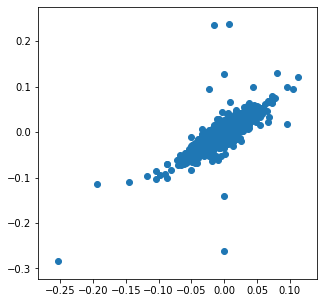

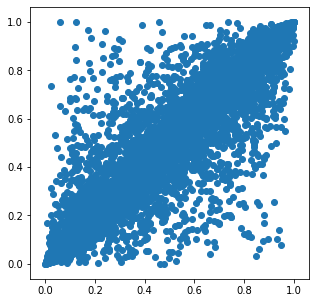

In [204]:
# plt.scatter(rs, rf)
s = 'LINKUSDT'

rs = priceData[s].loc[:, 'rs'] 
rf = priceData[s].loc[:, 'rf'] 

i = ECDF(rs)(rs)
j = ECDF(rf)(rf)

plt.figure(figsize=(5,5))
plt.scatter(rs,rf)

plt.figure(figsize=(5,5))
plt.scatter(i,j)

# plt.show()

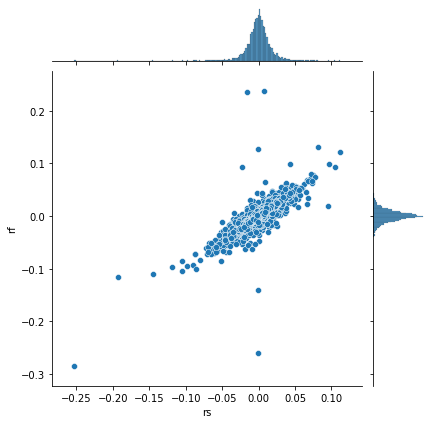

In [205]:
sns.jointplot(x=rs, y=rf)

In [208]:
_id = priceData[s].rs==0
priceData[s].loc[_id, :]

,timestamp2,symbol_x,midPrice_x,symbol_y,midPrice_y,rs,rf
60,2021-06-21 00:00:00,LINKUSDT,21.67575,LINKUSDTM21,22.0450,0.0,-0.003588
3474,2021-01-29 18:00:00,LINKUSDT,23.17150,LINKUSDTH21,29.3755,0.0,0.002710
4977,2020-11-28 03:00:00,LINKUSDT,12.56150,LINKUSDTZ20,12.7120,0.0,0.003921


In [207]:
priceData[s].loc[5216:5220,:]

,timestamp2,symbol_x,midPrice_x,symbol_y,midPrice_y,rs,rf
5216,2020-11-18 04:00:00,LINKUSDT,13.99375,LINKUSDTZ20,14.31275,0.005087,0.003605
5217,2020-11-18 03:00:00,LINKUSDT,13.92275,LINKUSDTZ20,14.26125,0.006991,0.004973
5218,2020-11-18 02:00:00,LINKUSDT,13.82575,LINKUSDTZ20,14.19050,-0.006668,0.000000
5219,2020-11-18 01:00:00,LINKUSDT,13.91825,LINKUSDTZ20,14.19050,-0.000180,-0.006322
5220,2020-11-18 00:00:00,LINKUSDT,13.92075,LINKUSDTZ20,14.28050,0.036802,0.051070


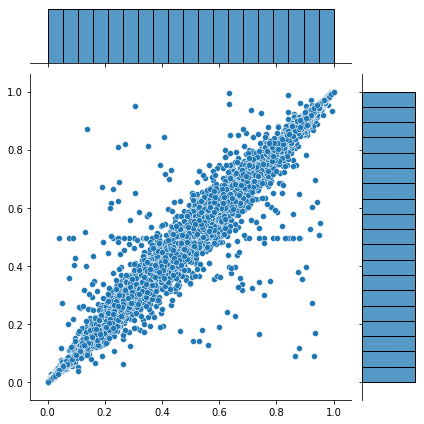

In [176]:
sns.jointplot(x=i, y=j)

In [168]:
for s in priceData:
    priceData[s].timestamp2 = pd.to_datetime(priceData[s].timestamp2)
    priceData[s] = priceData[s].sort_values('timestamp2', ascending=False)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional in

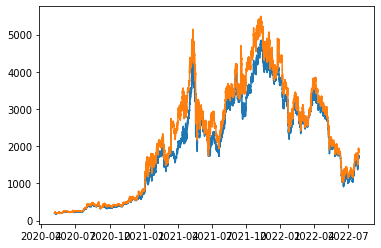

In [169]:
plt.plot(priceData[s].timestamp2, priceData[s].midPrice_x)
plt.plot(priceData[s].timestamp2, priceData[s].midPrice_y)

/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/francis/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional in

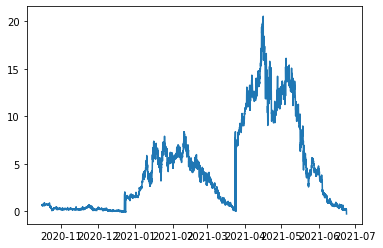

In [381]:
plt.plot(priceData[s].timestamp2, priceData[s].midPrice_y- priceData[s].midPrice_x)
# plt.plot(priceData[s].timestamp2, )

In [319]:
df = priceData[s].copy()

In [320]:
_2hGrid = [i for i in range(0, 26, 2)]
_4hGrid = [i for i in range(0, 28, 4)]
_8hGrid = [i for i in range(0, 32, 8)]
_12hGrid = [i for i in range(0, 36, 12)]


In [321]:
_id = df.timestamp2.apply(lambda x : x.hour in _2hGrid)
df = df.loc[_id,:]

df.sort_values('timestamp2', inplace=True, ascending=False)
df.reset_index(drop=True, inplace=True)

In [322]:
df.rs = np.log(df.midPrice_x/df.midPrice_x.shift(-1))
df.rf = np.log(df.midPrice_y/df.midPrice_y.shift(-1))

In [329]:
24/12*365*np.log(11.24800/11.30625)

-3.770694618006266

In [334]:
24/12*365*np.mean(df.rf)

0.12212563499842116

In [323]:
df.iloc[1:-1,:]

,timestamp2,symbol_x,midPrice_x,symbol_y,midPrice_y,rs,rf
1,2021-06-23 20:00:00,LINKUSDT,17.72325,LINKUSDTM21,17.93025,-0.001719,-0.001978
2,2021-06-23 18:00:00,LINKUSDT,17.75375,LINKUSDTM21,17.96575,-0.035360,-0.036601
3,2021-06-23 16:00:00,LINKUSDT,18.39275,LINKUSDTM21,18.63550,-0.016540,-0.013763
4,2021-06-23 14:00:00,LINKUSDT,18.69950,LINKUSDTM21,18.89375,-0.008918,-0.008721
5,2021-06-23 12:00:00,LINKUSDT,18.86700,LINKUSDTM21,19.05925,0.104245,0.104127
...,...,...,...,...,...,...,...
2998,2020-10-16 14:00:00,LINKUSDT,10.61025,LINKUSDTZ20,11.24800,-0.008890,-0.005165
2999,2020-10-16 12:00:00,LINKUSDT,10.70500,LINKUSDTZ20,11.30625,0.017884,0.013939
3000,2020-10-16 10:00:00,LINKUSDT,10.51525,LINKUSDTZ20,11.14975,0.008596,0.014613
3001,2020-10-16 08:00:00,LINKUSDT,10.42525,LINKUSDTZ20,10.98800,-0.004522,-0.017390


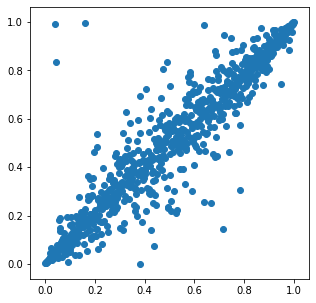

In [313]:
rs = df.rs.copy()
rf = df.rf.copy()

i = ECDF(rs)(rs)
j = ECDF(rf)(rf)

plt.figure(figsize=(5,5))
plt.scatter(i, j)

In [375]:
h_arr = np.linspace(0.5,1.5,4000)


VaR5 = []
VaR1 = []

ES5 = []
ES1 = []


std = []


for h in h_arr:
    rh = (rs-h*rf)[:-1]
    lq5 = np.quantile(rh, .05)
    lq1 = np.quantile(rh, .01)


    VaR5.append(-lq5)
    ES5.append(-np.mean(rh[rh<lq5]))
    
    VaR1.append(-lq1)
    ES1.append(-np.mean(rh[rh<lq1]))
    
    std.append(np.std(rh))


0.826331582895724


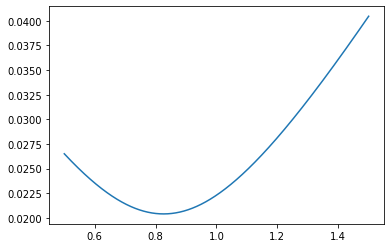

In [376]:
plt.plot(h_arr, std)
print(h_arr[np.argmin(std)])

0.8800950237559391


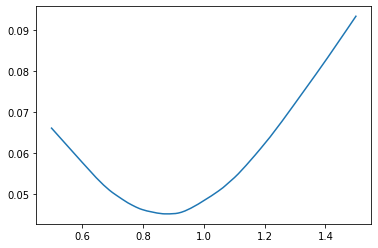

In [377]:
plt.plot(h_arr, ES5)
print(h_arr[np.argmin(ES5)])

0.8303325831457865


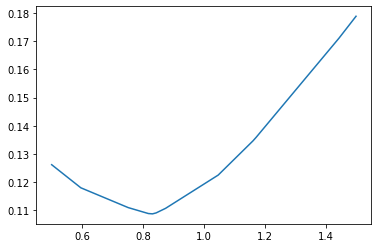

In [379]:
plt.plot(h_arr, ES1)
print(h_arr[np.argmin(ES1)])

0.8083270817704427


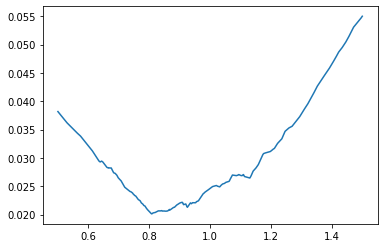

In [378]:
plt.plot(h_arr, VaR5)
print(h_arr[np.argmin(VaR5)])

0.8540885221305327


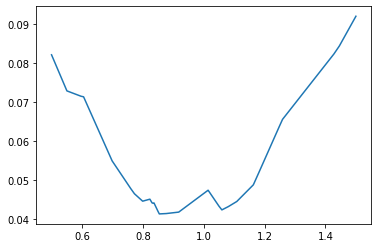

In [380]:
plt.plot(h_arr, VaR1)
print(h_arr[np.argmin(VaR1)])